# Analysis of the results

This notebook will contain the analysis of all of the results from all of the models.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

classification_results_df = pd.read_csv('../results/pretrained_classification_results.csv')

classification_results_df

Model Name     Top 1%     Top 5%
0               PretrainedCustomGoogleNet  41.927563  84.960098
1    PretrainedCustomResNet18_FeatureOnly  44.076118  84.898712
2      PretrainedCustomResNet18_LastLayer  43.093922  84.775940
3    PretrainedCustomResNet18_Last2Layers  44.383057  84.775940
4    PretrainedCustomResNet34_FeatureOnly  44.505833  86.801720
5      PretrainedCustomResNet34_LastLayer  44.628605  86.617554
6    PretrainedCustomResNet34_Last2Layers  44.874157  86.003685
7    PretrainedCustomResNet50_FeatureOnly  46.101902  85.451195
8      PretrainedCustomResNet50_LastLayer  44.198895  85.328423
9    PretrainedCustomResNet50_Last2Layers  46.224678  85.635361
10  PretrainedCustomResNet101_FeatureOnly  46.654388  86.187843
11    PretrainedCustomResNet101_LastLayer  45.058319  86.556168
12  PretrainedCustomResNet101_Last2Layers  44.751381  87.047272
13  PretrainedCustomResNet152_FeatureOnly  46.654388  86.985878
14    PretrainedCustomResNet152_LastLayer  45.426643  87.047272
15  PretrainedCustomResNet152_Last2Layers  47.329651  86.924492
16    PretrainedCustomGoogleNet_LastLayer  41.927563  83.793739
17  PretrainedCustomGoogleNet_Last2Layers  42.050339  84.653160

Creating dataframe of losses for all models

In [2]:
loss_df = pd.read_csv('../models/predefined/state/loss_values.csv')
loss_df = loss_df[loss_df['Model Name'].str.contains('Pretrained')]
models = loss_df['Model Name'].unique()
loss_df


Epochs  Training Loss  Testing Loss  \
120       1       4.760871      2.905321   
121       2       2.618336      2.327067   
122       3       2.197508      2.130614   
123       4       1.995019      2.018263   
124       5       1.845321      1.952605   
..      ...            ...           ...   
295       6       1.754752      1.890942   
296       7       1.666162      1.852758   
297       8       1.610444      1.825527   
298       9       1.521136      1.824292   
299      10       1.471889      1.794000   

                                Model Name  
120              PretrainedCustomGoogleNet  
121              PretrainedCustomGoogleNet  
122              PretrainedCustomGoogleNet  
123              PretrainedCustomGoogleNet  
124              PretrainedCustomGoogleNet  
..                                     ...  
295  PretrainedCustomGoogleNet_Last2Layers  
296  PretrainedCustomGoogleNet_Last2Layers  
297  PretrainedCustomGoogleNet_Last2Layers  
298  PretrainedCustomGoogleNet_Last2Layers  
299  PretrainedCustomGoogleNet_Last2Layers  

[180 rows x 4 columns]

In [3]:
models

array(['PretrainedCustomGoogleNet',
       'PretrainedCustomResNet18_FeatureOnly',
       'PretrainedCustomResNet18_LastLayer',
       'PretrainedCustomResNet18_Last2Layers',
       'PretrainedCustomResNet34_FeatureOnly',
       'PretrainedCustomResNet34_LastLayer',
       'PretrainedCustomResNet34_Last2Layers',
       'PretrainedCustomResNet50_FeatureOnly',
       'PretrainedCustomResNet50_LastLayer',
       'PretrainedCustomResNet50_Last2Layers',
       'PretrainedCustomResNet101_FeatureOnly',
       'PretrainedCustomResNet101_LastLayer',
       'PretrainedCustomResNet101_Last2Layers',
       'PretrainedCustomResNet152_FeatureOnly',
       'PretrainedCustomResNet152_LastLayer',
       'PretrainedCustomResNet152_Last2Layers',
       'PretrainedCustomGoogleNet_LastLayer',
       'PretrainedCustomGoogleNet_Last2Layers'], dtype=object)

Setting Seaborn theme and styling

In [4]:
myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)

## Plotting Testing and Training Losses for All Models
- Two separate graphs for testing and training loss, allowing a visual comparison of all the models

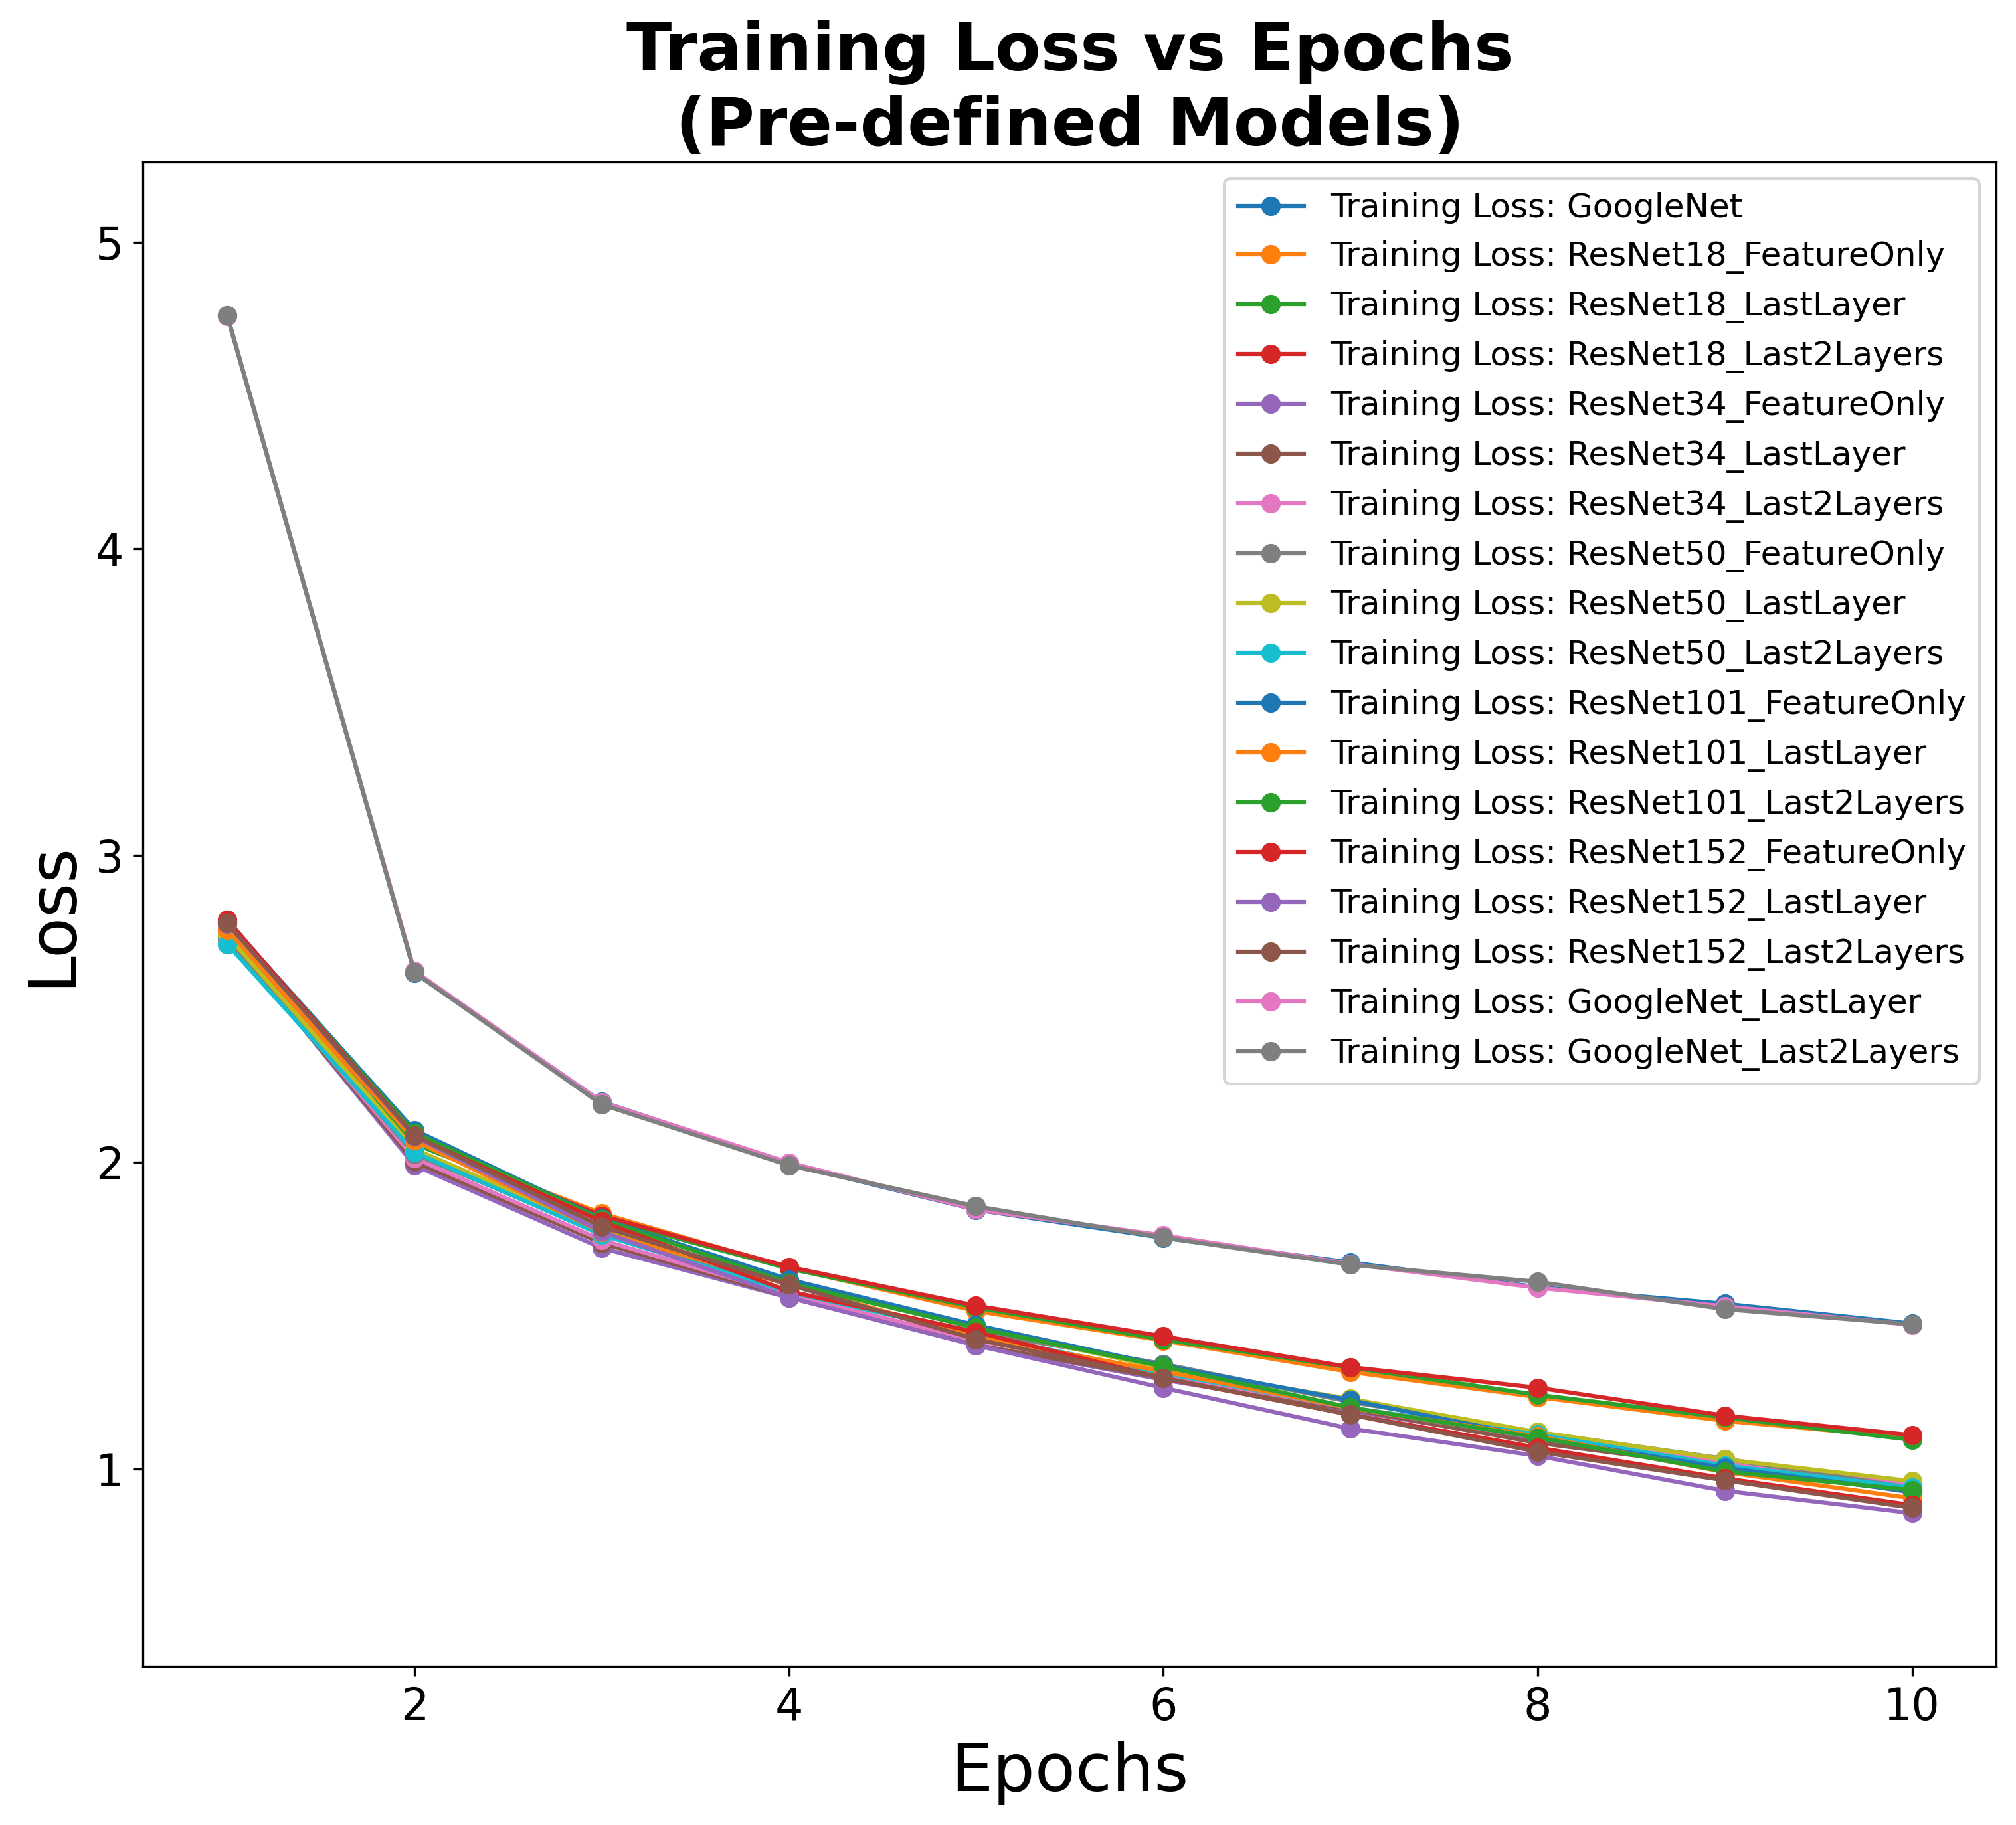

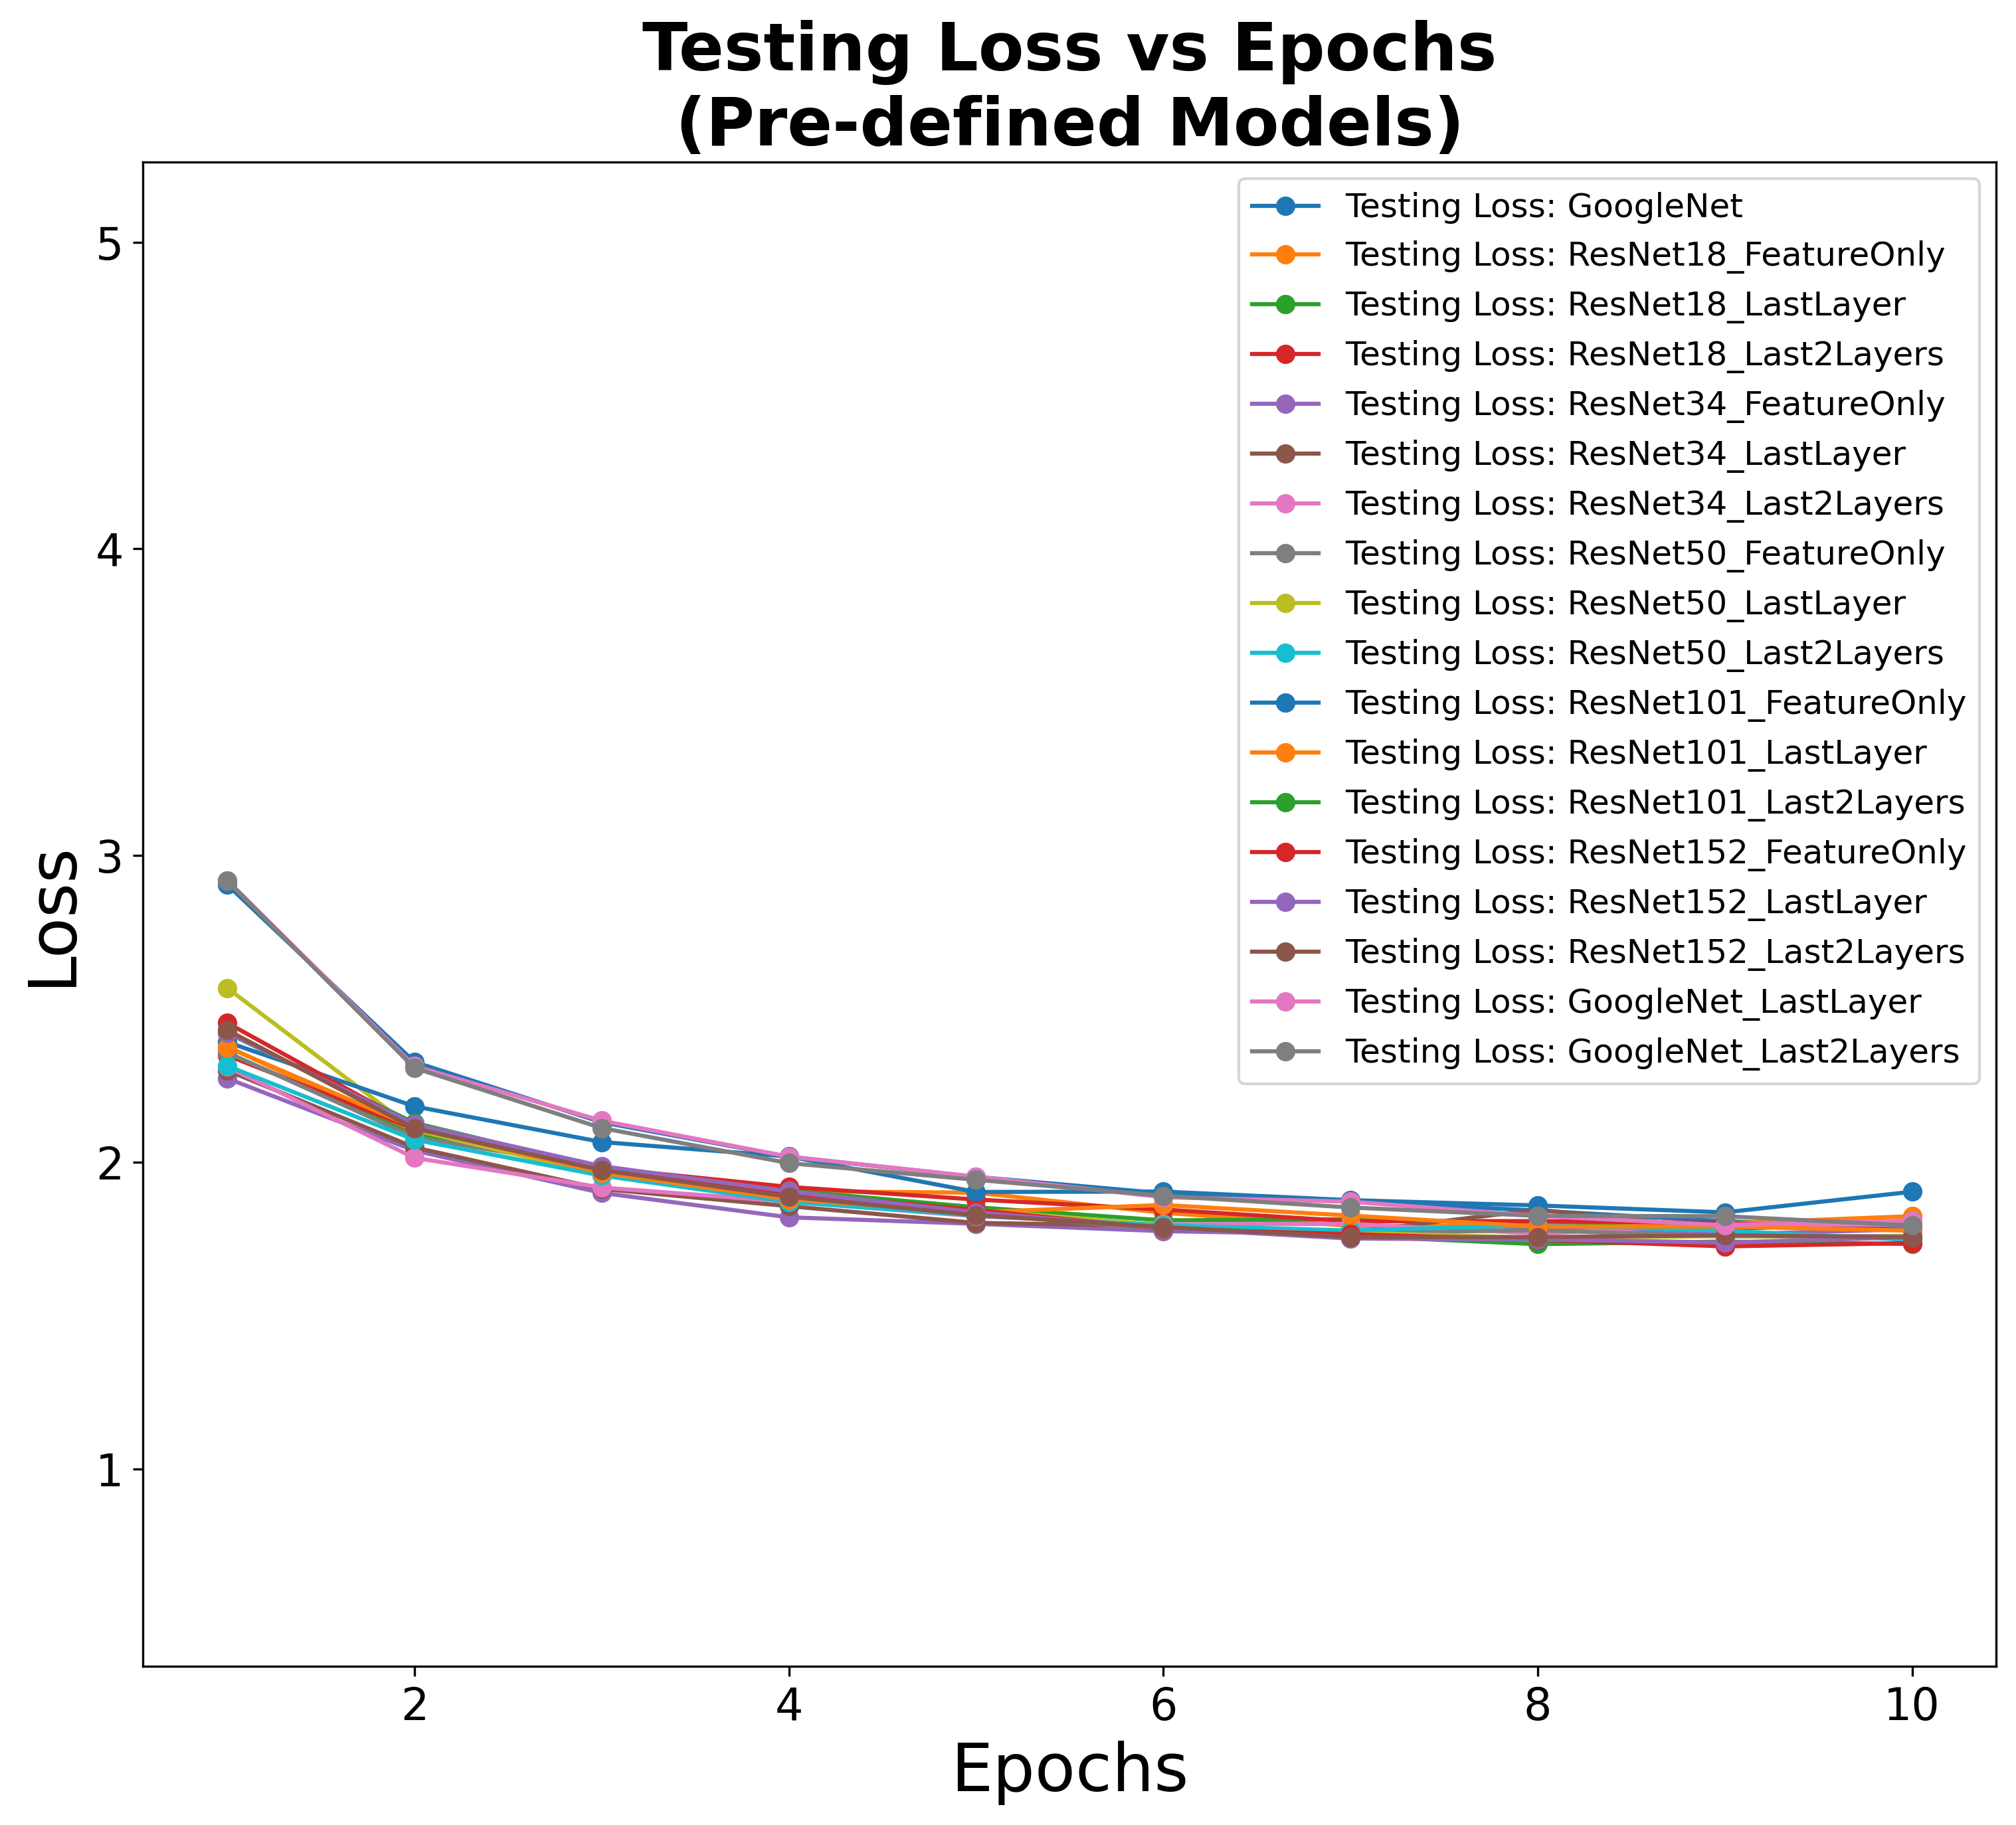

In [5]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
for loss in ['Training Loss', 'Testing Loss']:
    fig, ax = plt.subplots(figsize = (12,10), dpi = 300)
    for model in models:
        ax.plot(loss_df[loss_df['Model Name'] == model]['Epochs'], loss_df[loss_df['Model Name'] == model][loss], '-o', label = loss + ": " + model.replace('PretrainedCustom', ''), linewidth = 1.5)
        ax.set_xlabel("Epochs", fontsize = 24)
        ax.set_ylabel("Loss", fontsize = 24)
        ax.tick_params(
            axis = 'both',
            labelsize = 16)
        ax.legend(fontsize = 12)
        ax.set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax.set_title(loss + " vs Epochs\n(Pre-defined Models)", fontsize = 24, fontweight = 'bold')
    plt.savefig("output/Pretrained " + loss + " vs Epochs.jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig("output/Pretrained " + loss + " vs Epochs.pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

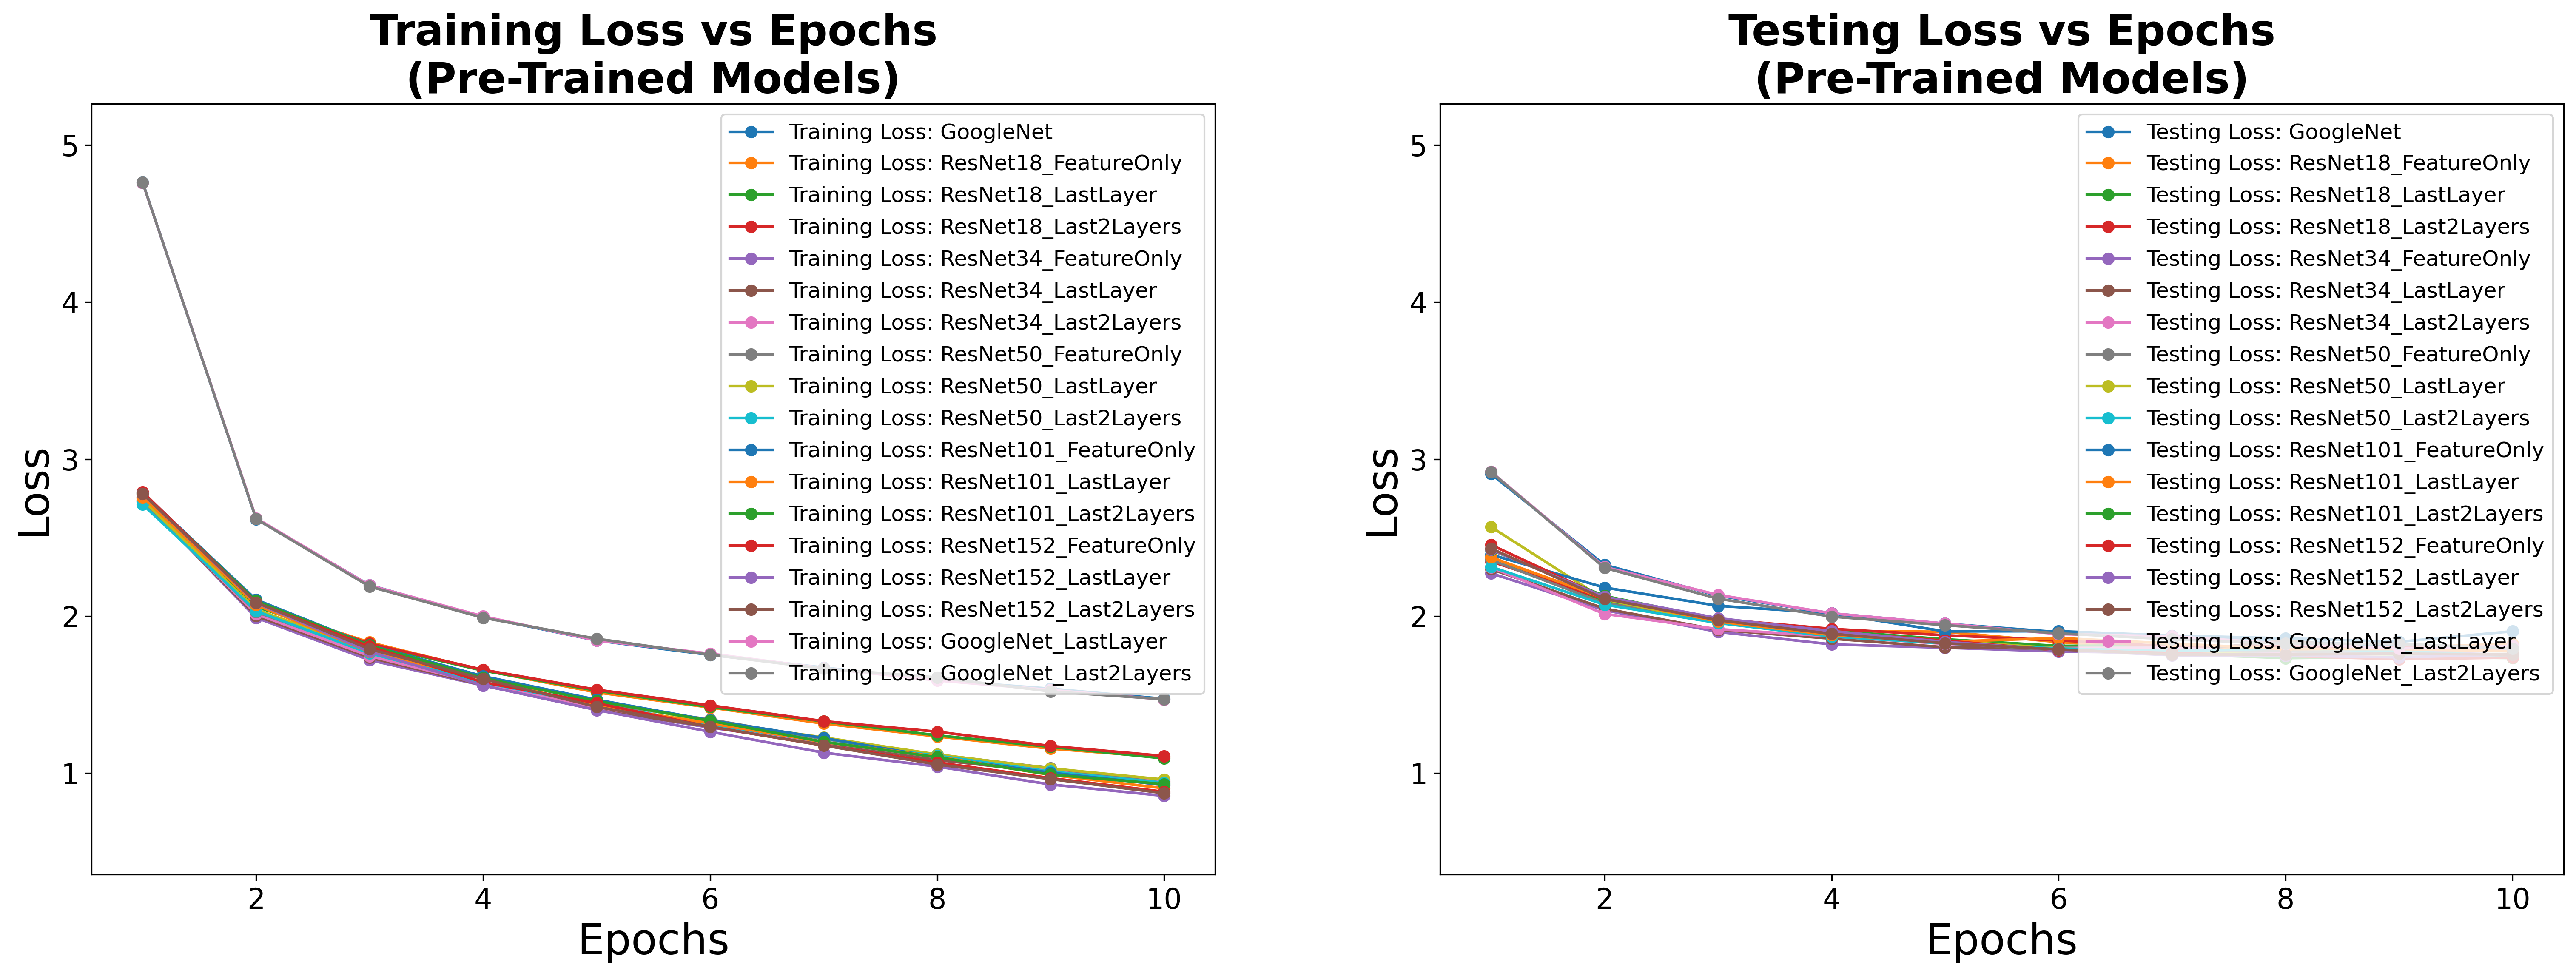

In [6]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
fig, ax = plt.subplots(1, 2, figsize = (25,8), dpi = 300)
for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
    for model in models:
        ax[idx].plot(loss_df[loss_df['Model Name'] == model]['Epochs'], 
                        loss_df[loss_df['Model Name'] == model][loss], 
                        '-o', 
                        label = loss + ": " + model.replace('PretrainedCustom', ''), 
                        linewidth = 1.5)
        ax[idx].set_xlabel("Epochs", fontsize = 24)
        ax[idx].set_ylabel("Loss", fontsize = 24)
        ax[idx].tick_params(
            axis = 'both',
            labelsize = 16)
        ax[idx].legend(fontsize = 12)
        ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax[idx].set_title(f"{loss} vs Epochs\n(Pre-Trained Models)", fontsize = 24, fontweight = 'bold')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side.pdf", dpi = 300, bbox_inches = 'tight')    
plt.show()

# Show specific model results

In [7]:
def generate_model_train_test_loss(model_name):
    filtered_loss_results_df = loss_df[loss_df['Model Name'].str.contains(model_name)]
    filtered_models = [model for model in models if model_name in model]

    # getting max yval so that plots have same y-axis for better comparison 
    max_yval = np.maximum(filtered_loss_results_df['Training Loss'], filtered_loss_results_df['Testing Loss']).max()
    min_yval = np.minimum(filtered_loss_results_df['Training Loss'], filtered_loss_results_df['Testing Loss']).min()

    # getting the two graphs for testing and training loss 
    fig, ax = plt.subplots(1, 2, figsize = (20,8), dpi = 300)
    for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
        for model in filtered_models:
            ax[idx].plot(filtered_loss_results_df[filtered_loss_results_df['Model Name'] == model]['Epochs'], 
                         filtered_loss_results_df[filtered_loss_results_df['Model Name'] == model][loss], 
                         '-o', 
                         label = loss + ": " + model.replace('PretrainedCustom', ''), 
                         linewidth = 1.5)
            ax[idx].set_xlabel("Epochs", fontsize = 24)
            ax[idx].set_ylabel("Loss", fontsize = 24)
            ax[idx].tick_params(
                axis = 'both',
                labelsize = 16)
            ax[idx].legend(fontsize = 12)
            ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
            ax[idx].set_title(f"{loss} vs Epochs\n(Pre-Trained {model_name})", fontsize = 24, fontweight = 'bold')
    plt.savefig(f"output/Pretrained Loss vs Epochs_{model_name}.jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig(f"output/Pretrained Loss vs Epochs_{model_name}.pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

## GoogLeNet Results

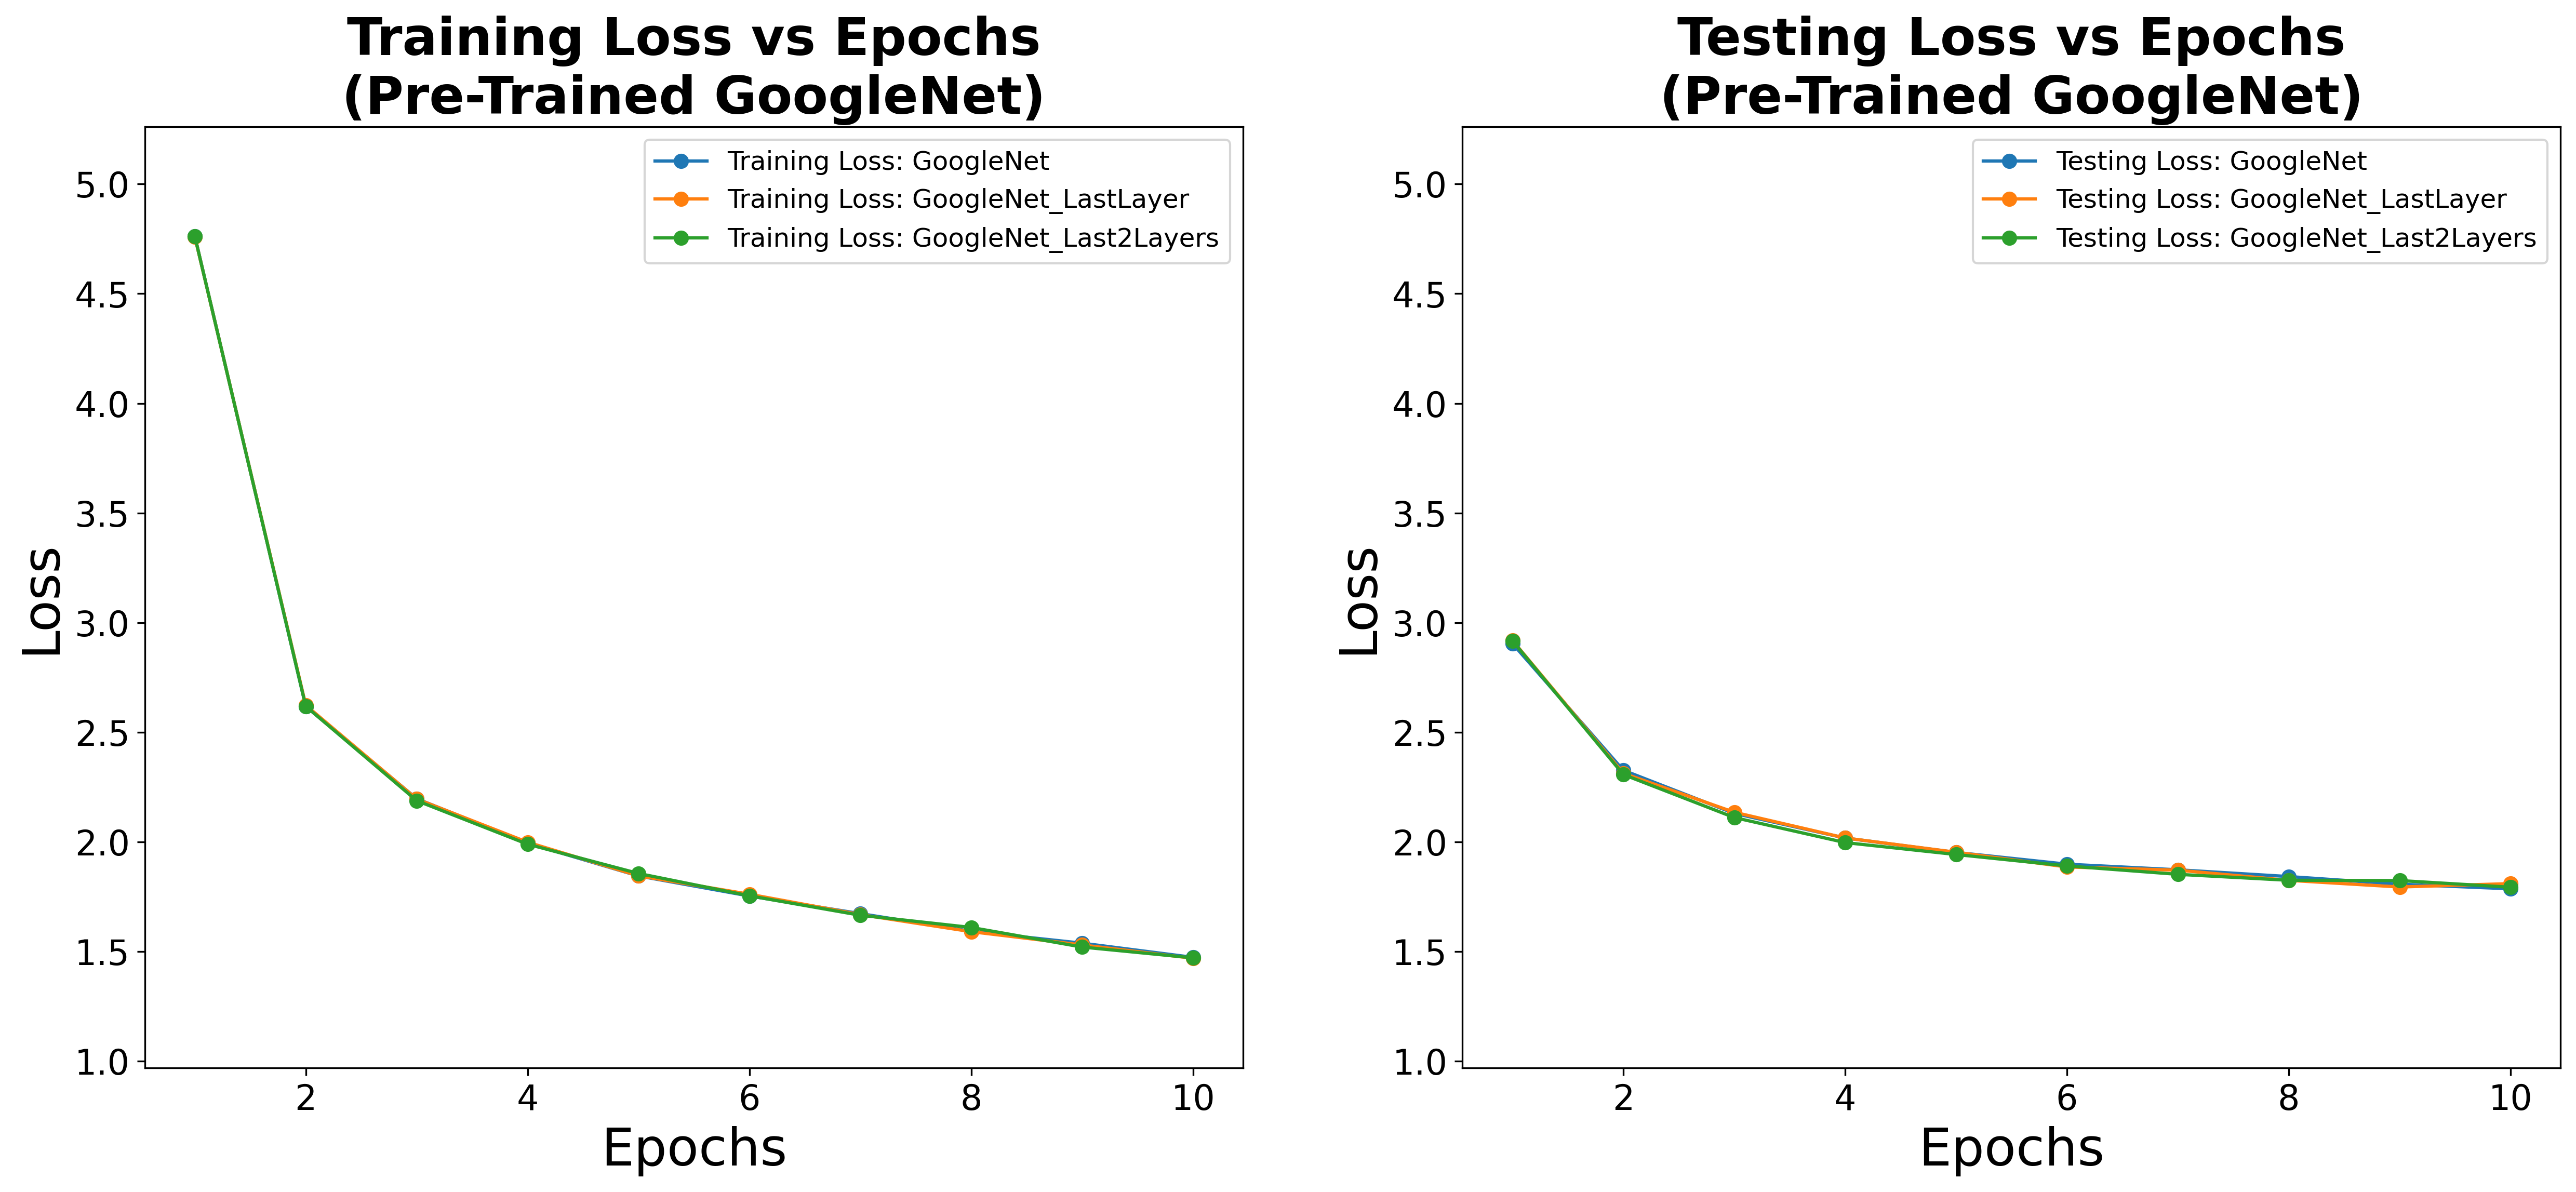

In [8]:
generate_model_train_test_loss('GoogleNet')

## ResNet18 Results

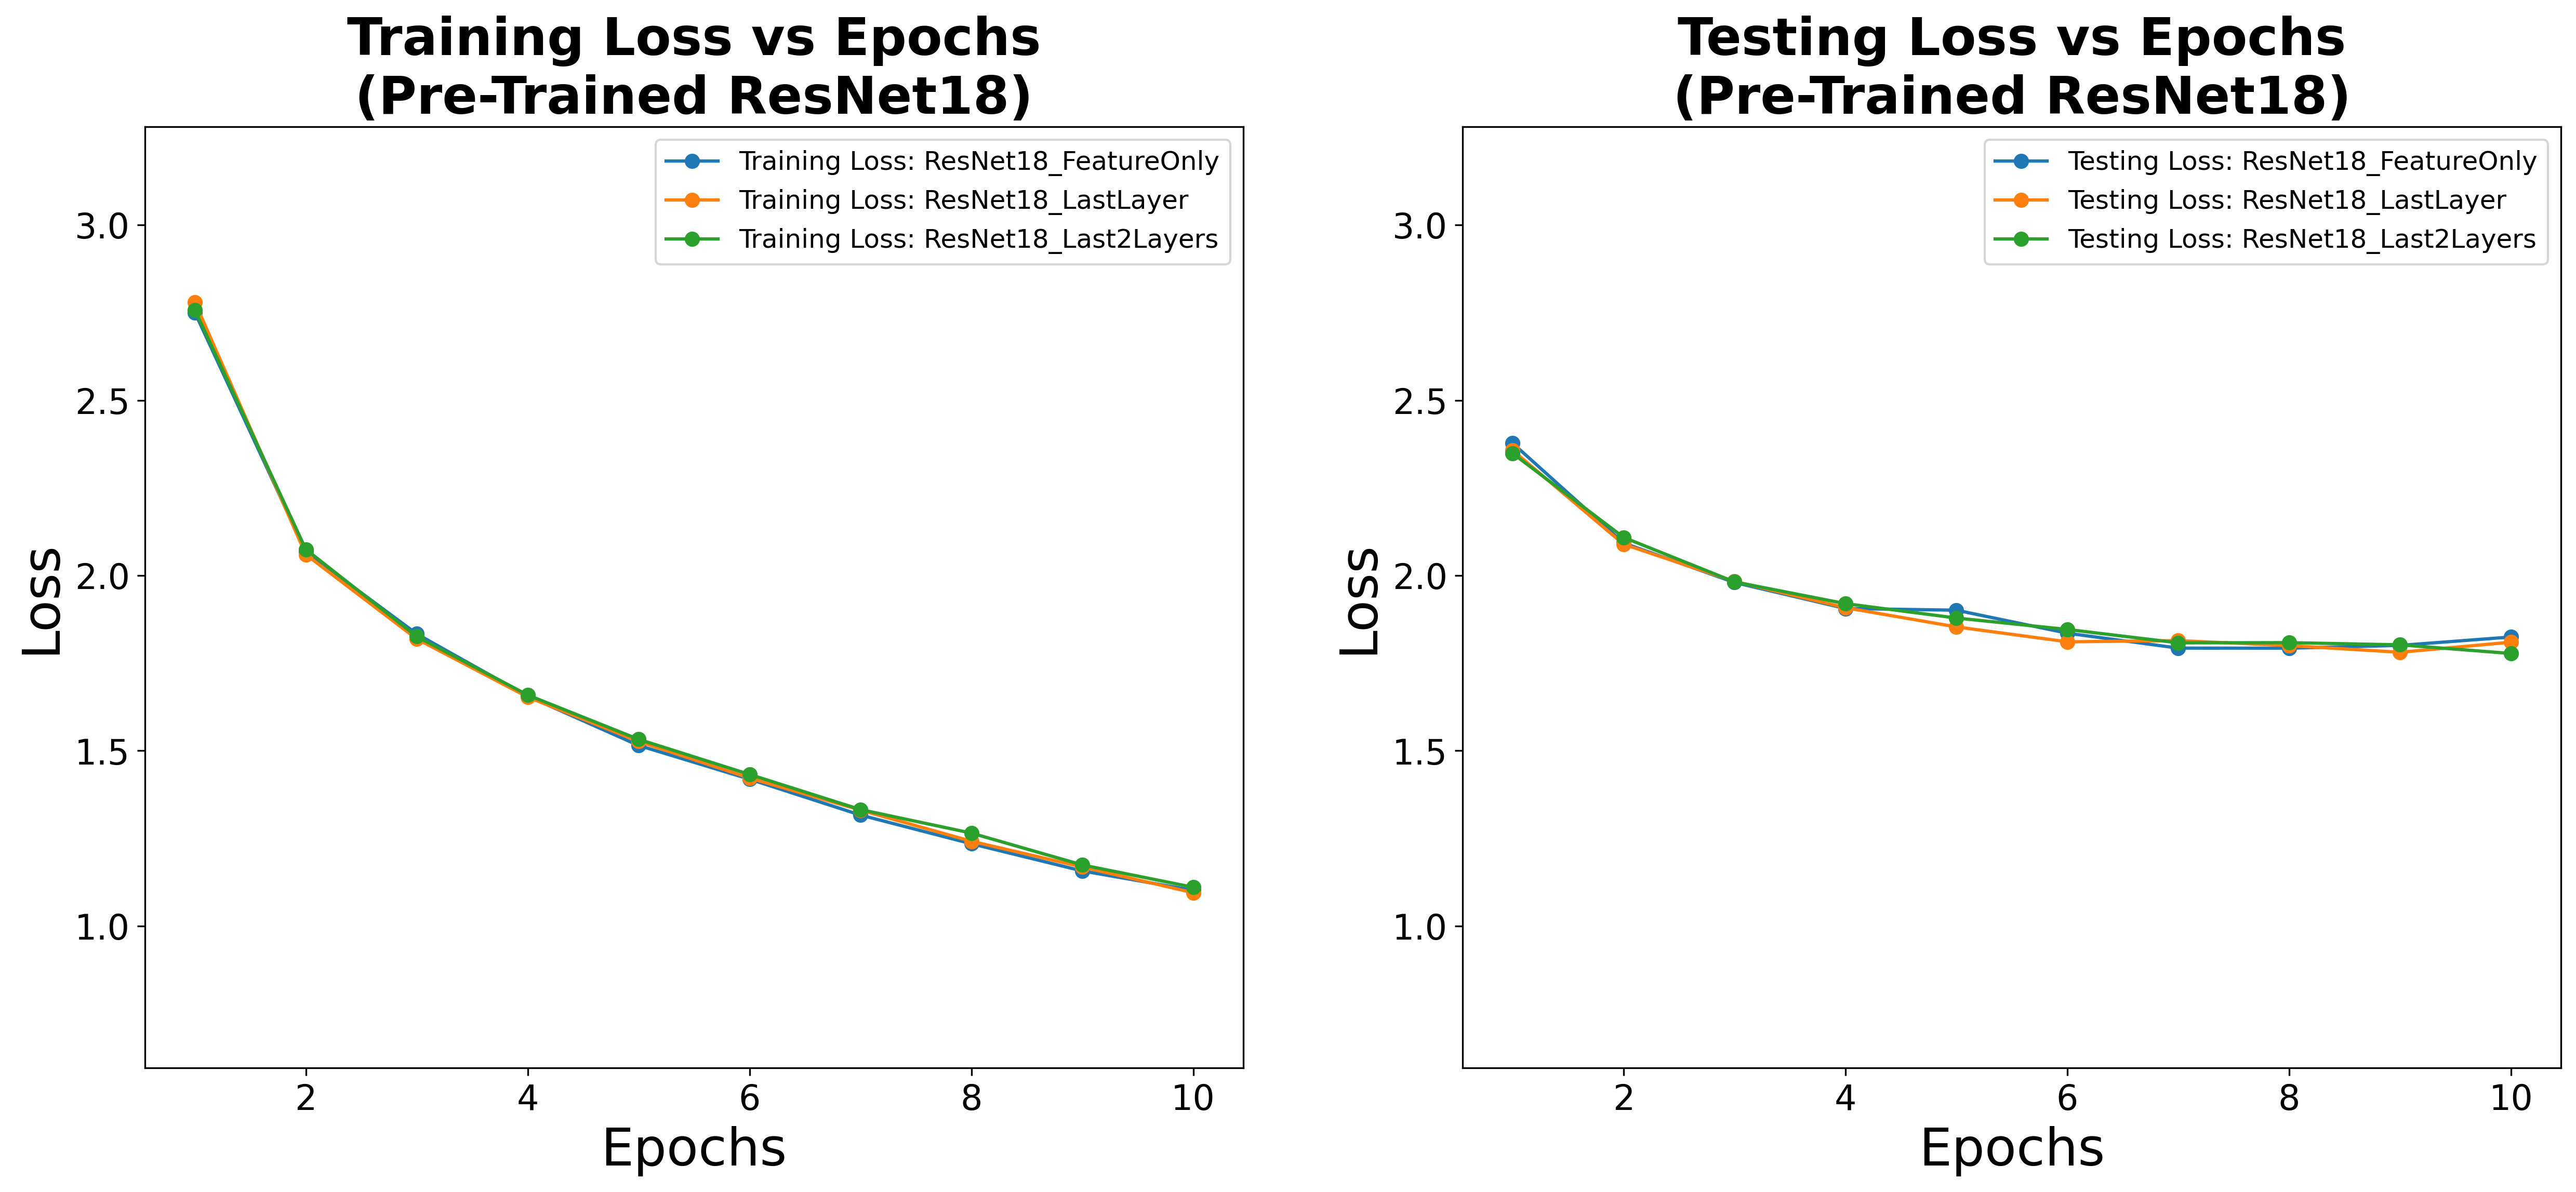

In [9]:
generate_model_train_test_loss('ResNet18')

## ResNet34 Results

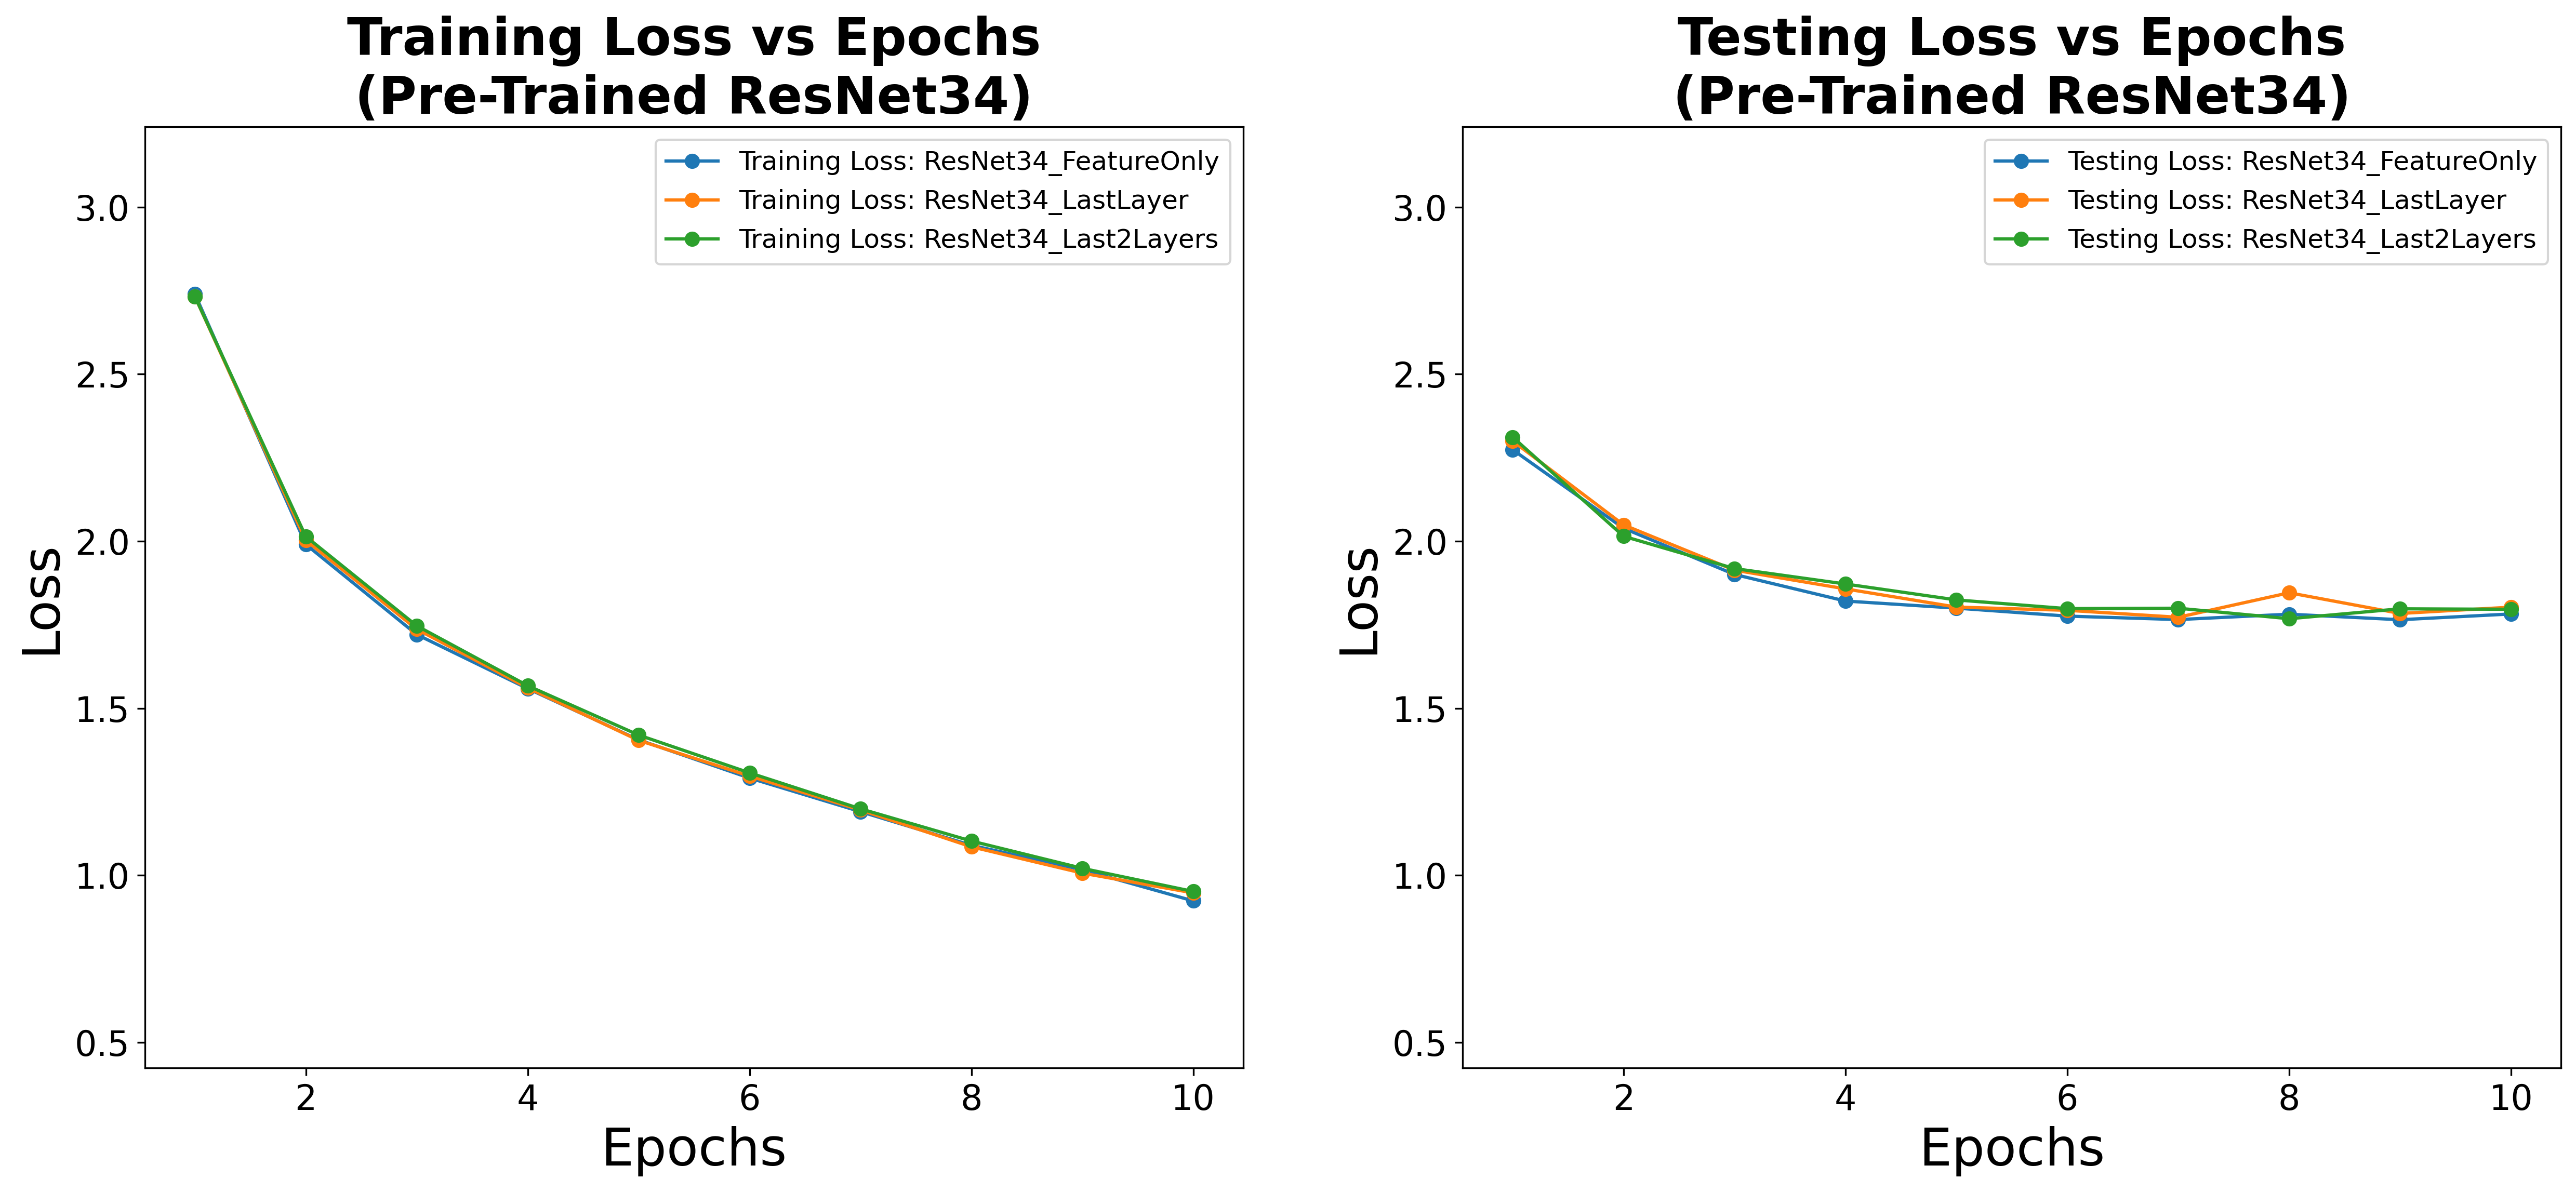

In [10]:
generate_model_train_test_loss('ResNet34')

## ResNet50 Results

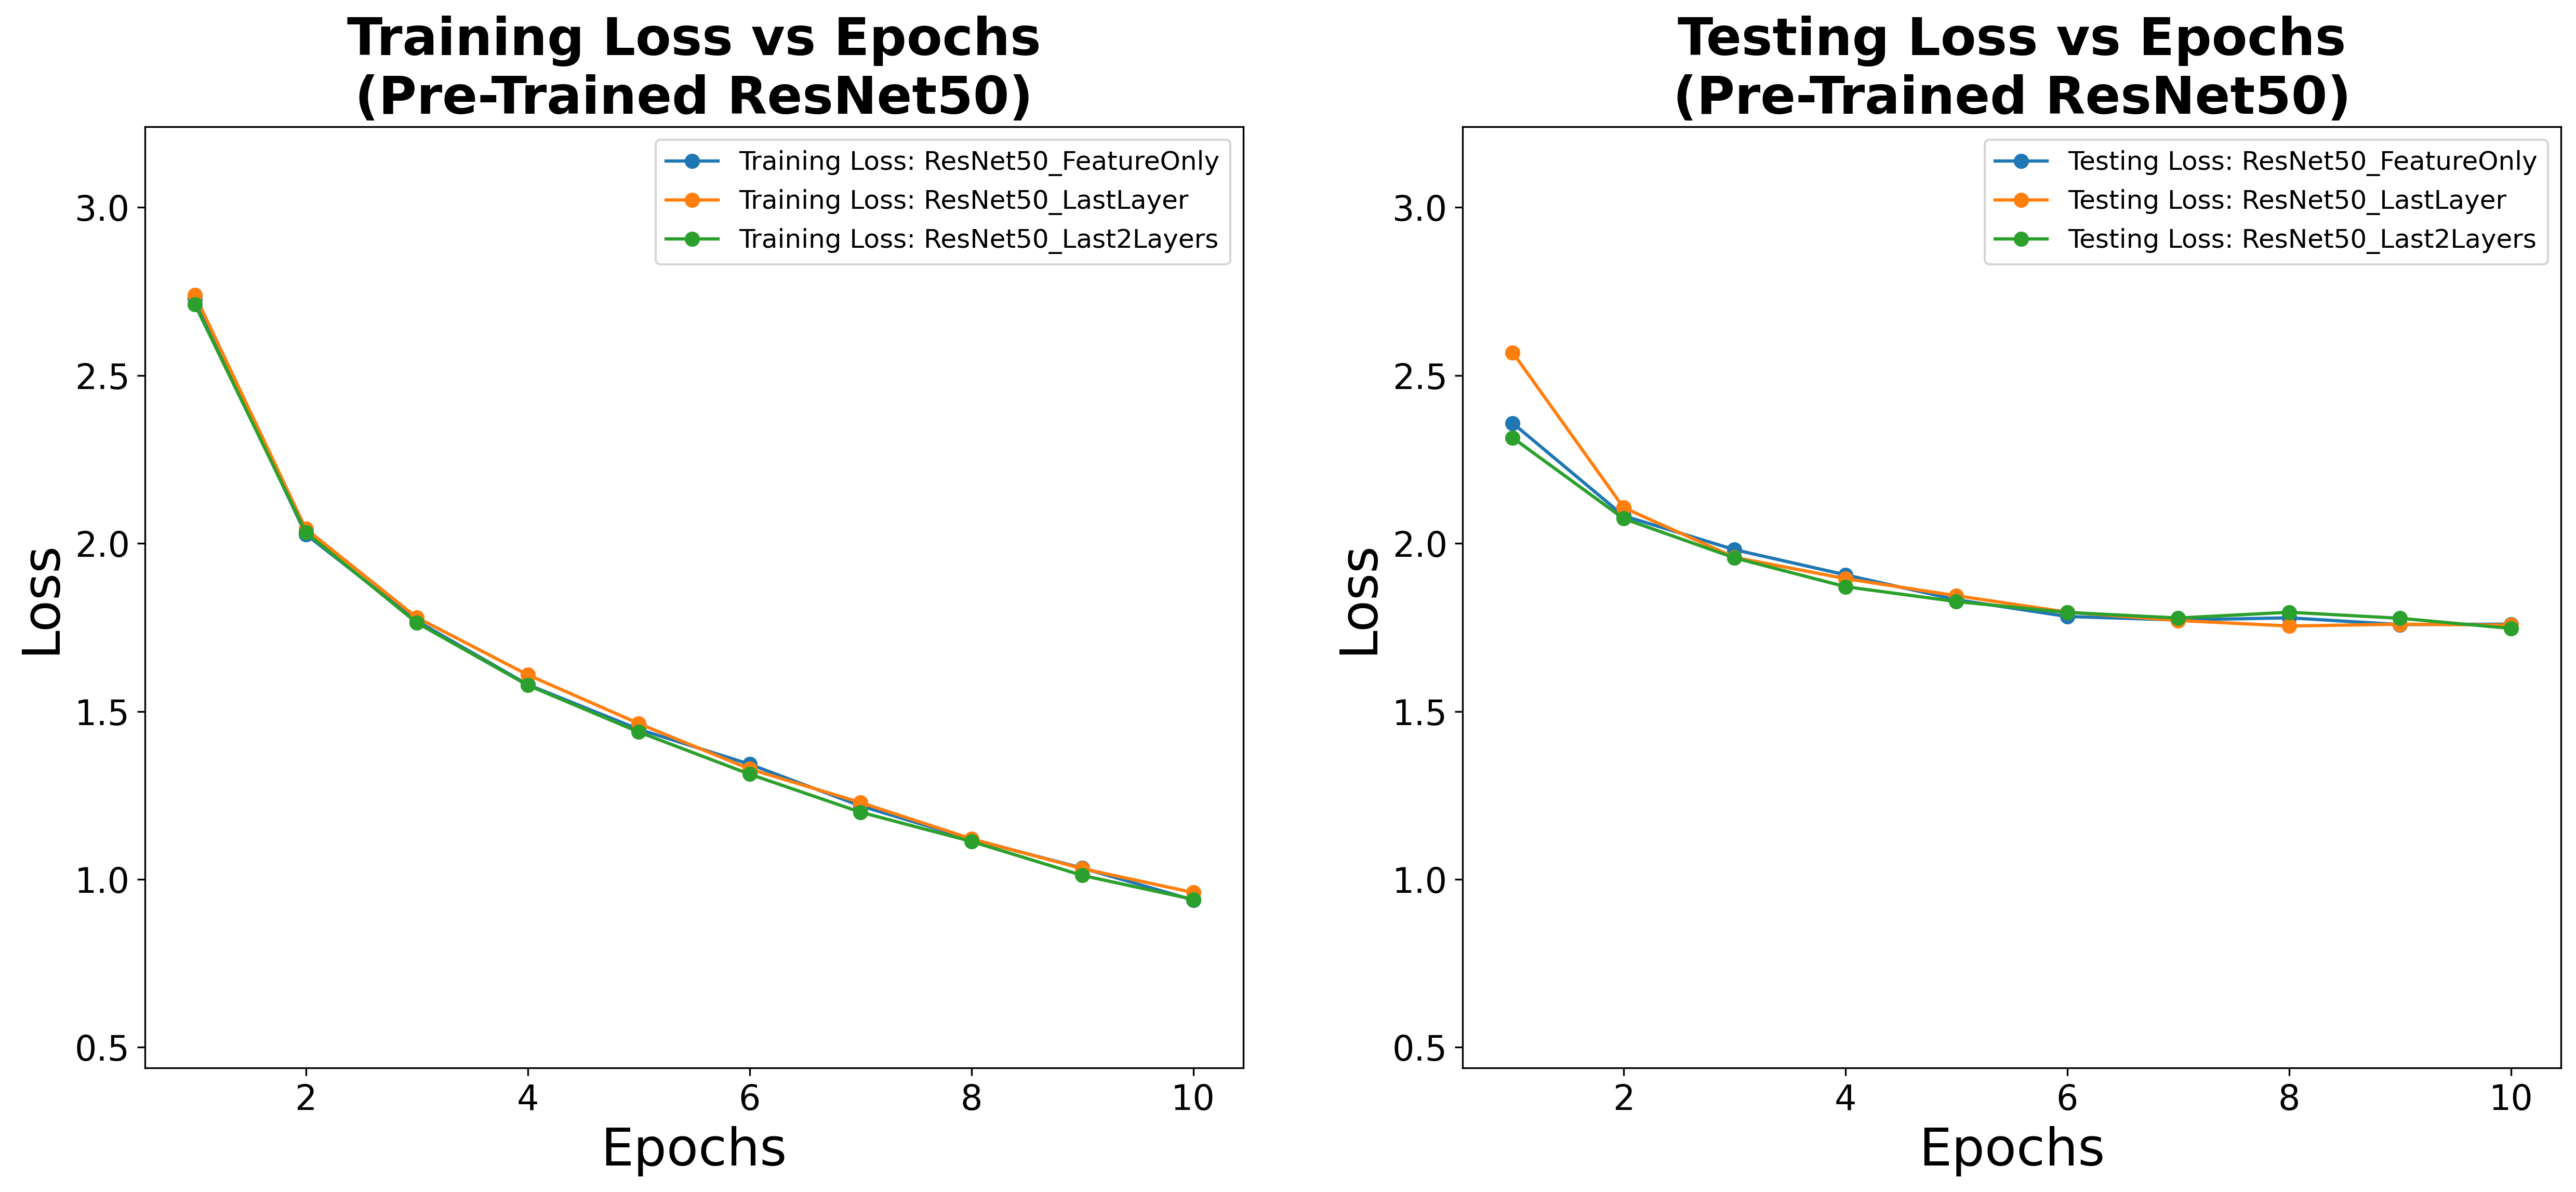

In [11]:
generate_model_train_test_loss('ResNet50')

## ResNet101 Results

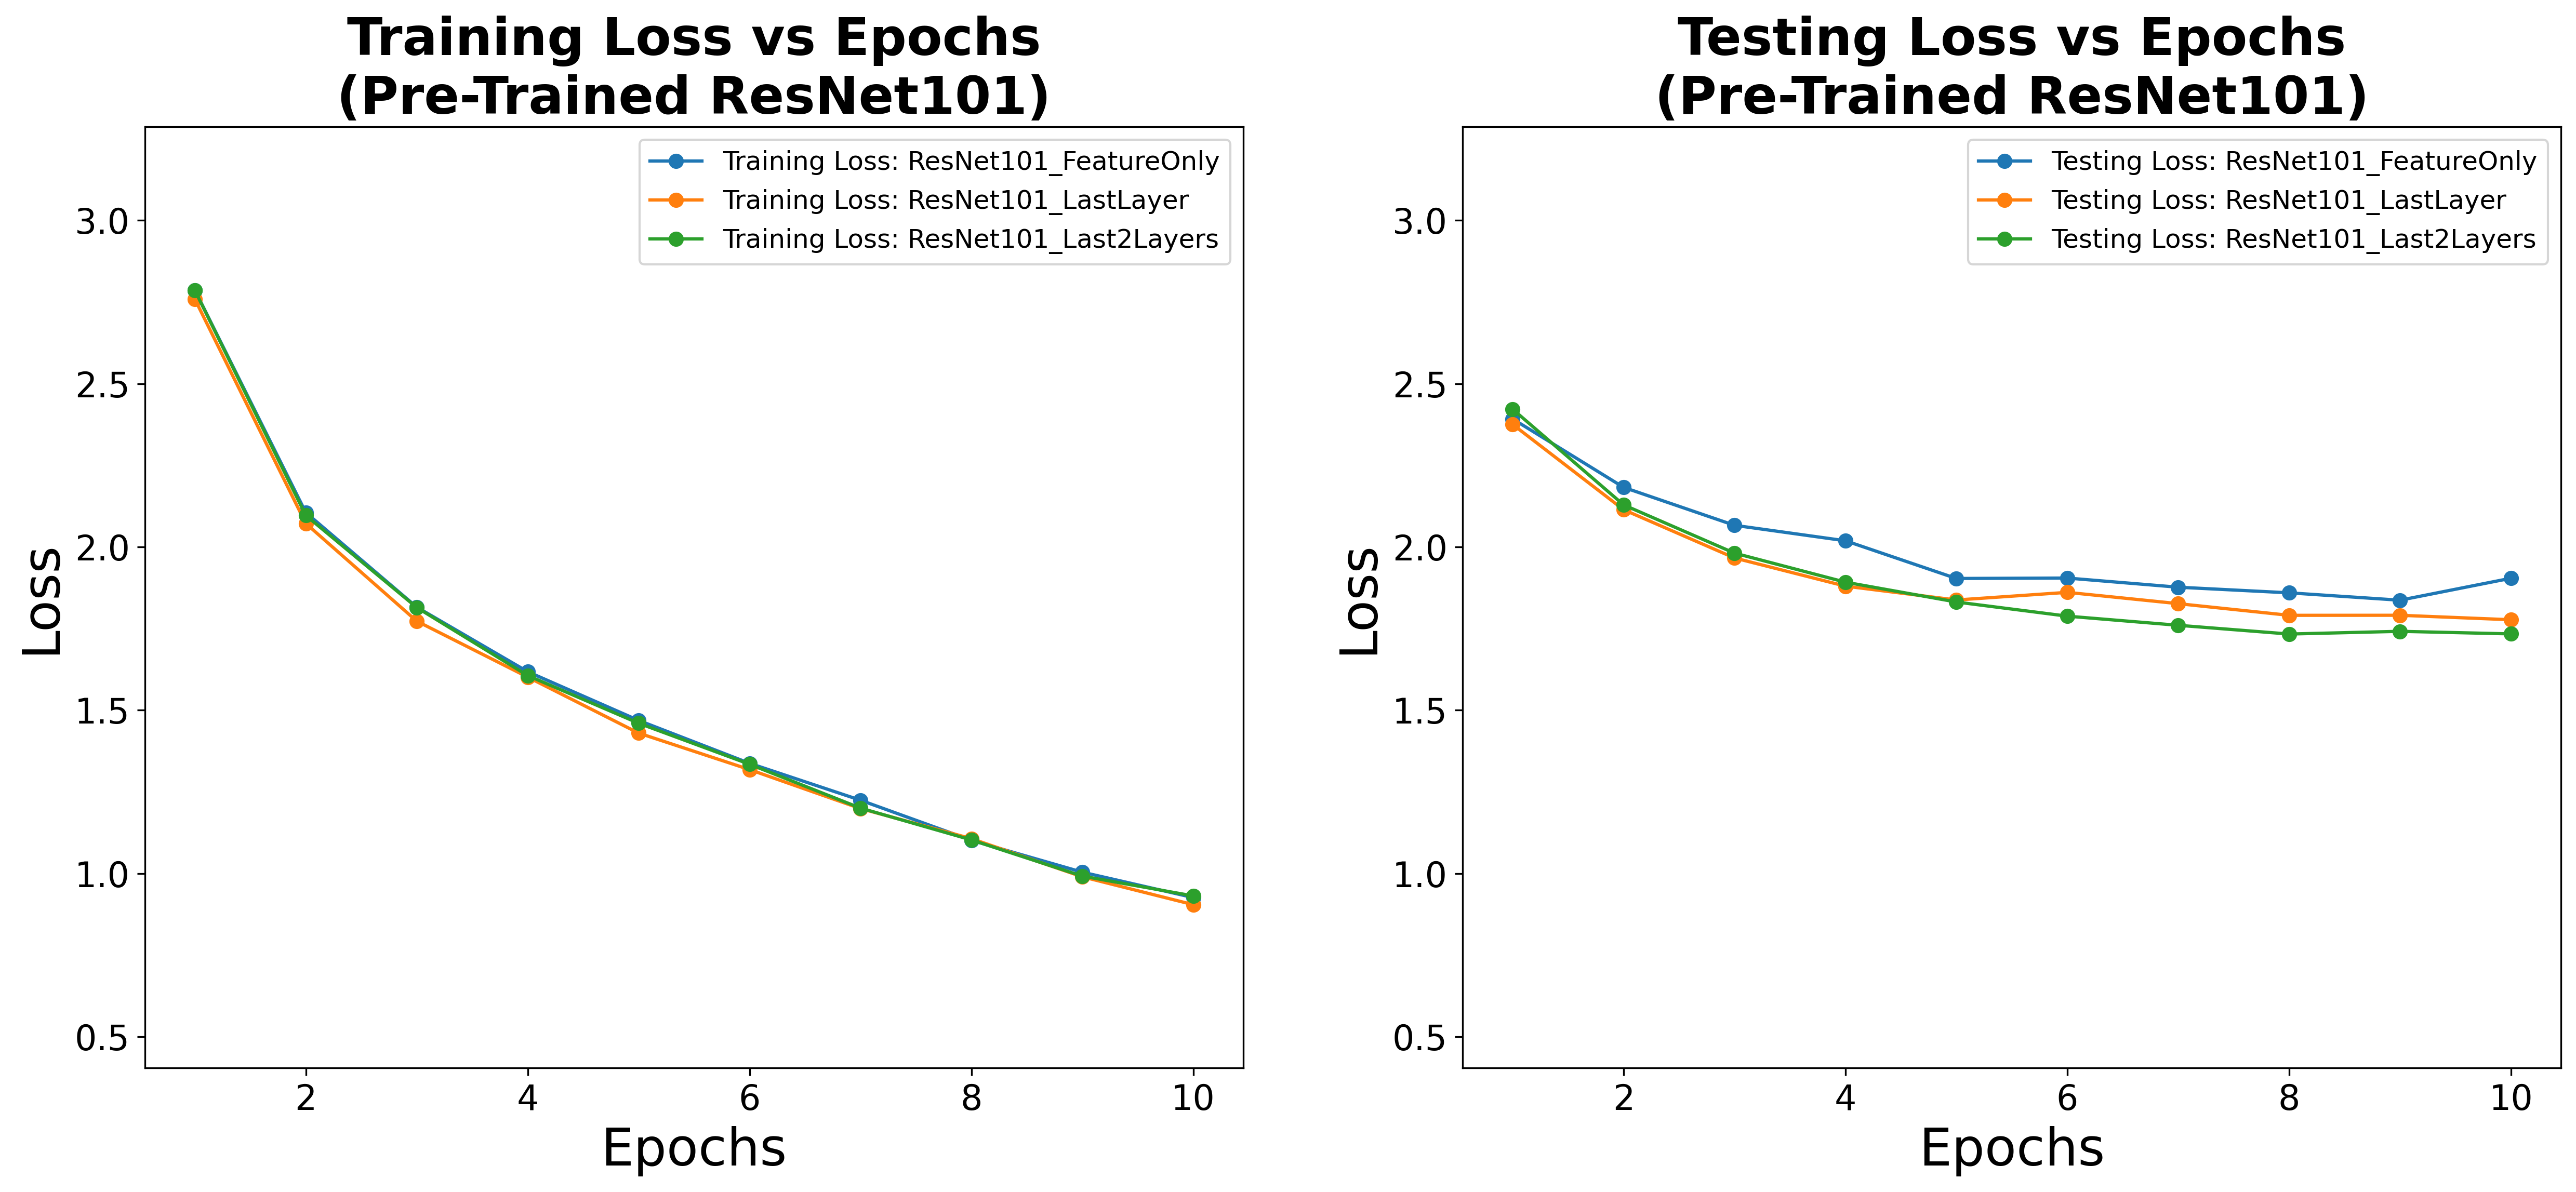

In [12]:
generate_model_train_test_loss('ResNet101')

## ResNet152 Results

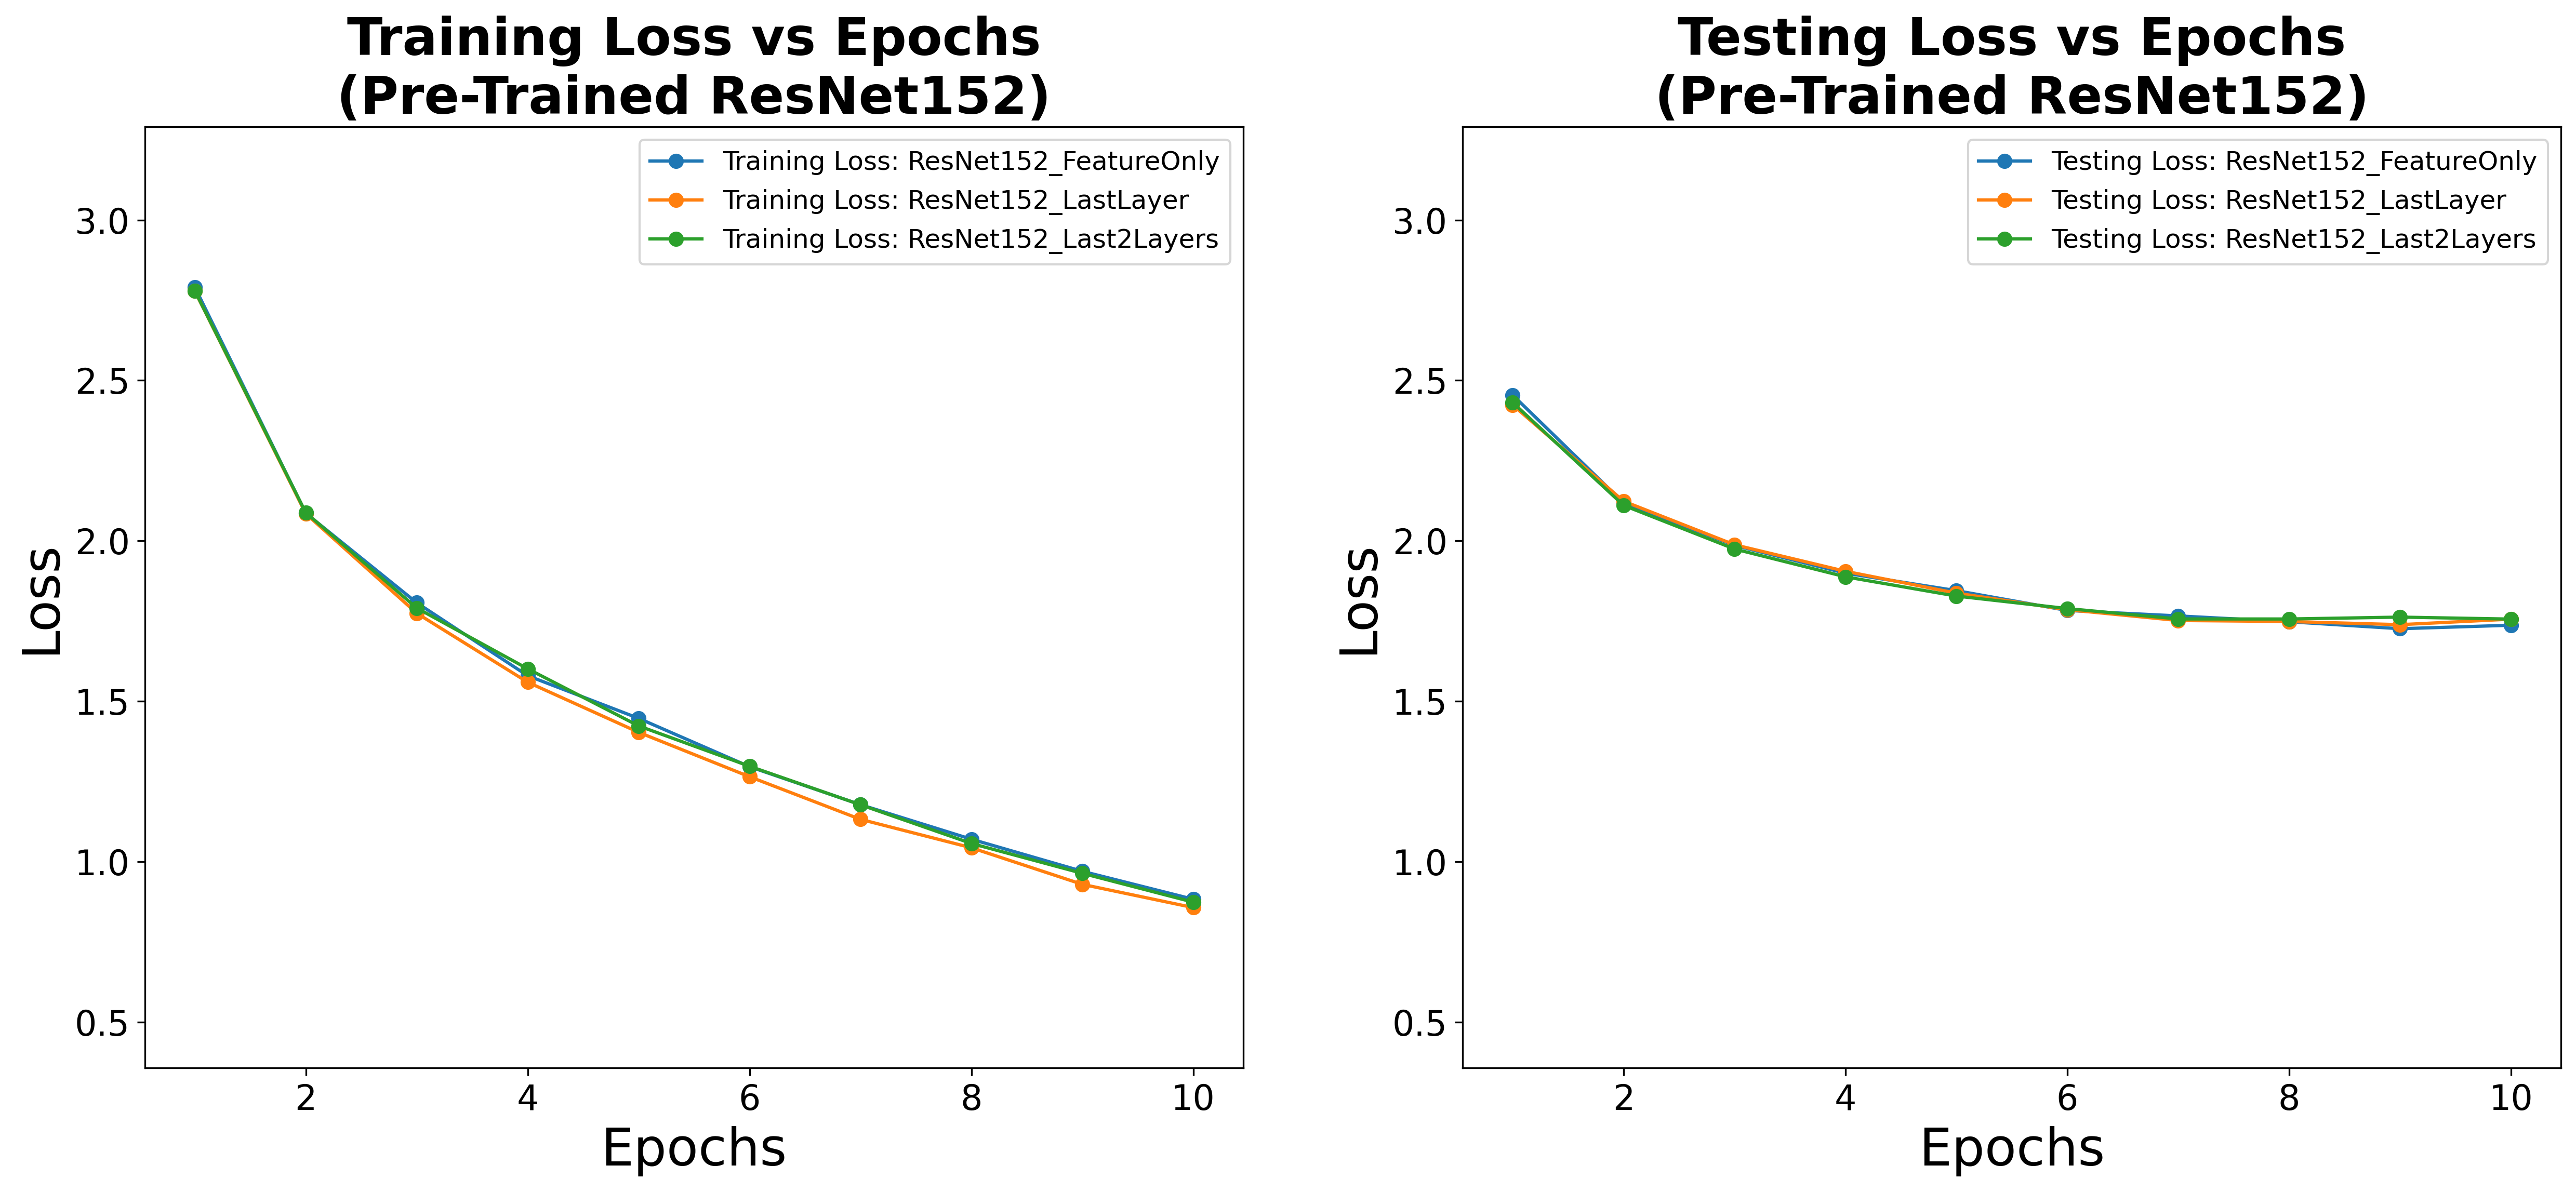

In [13]:
generate_model_train_test_loss('ResNet152')

## Plotting Grouped Barcharts by Accuracy and Model Type

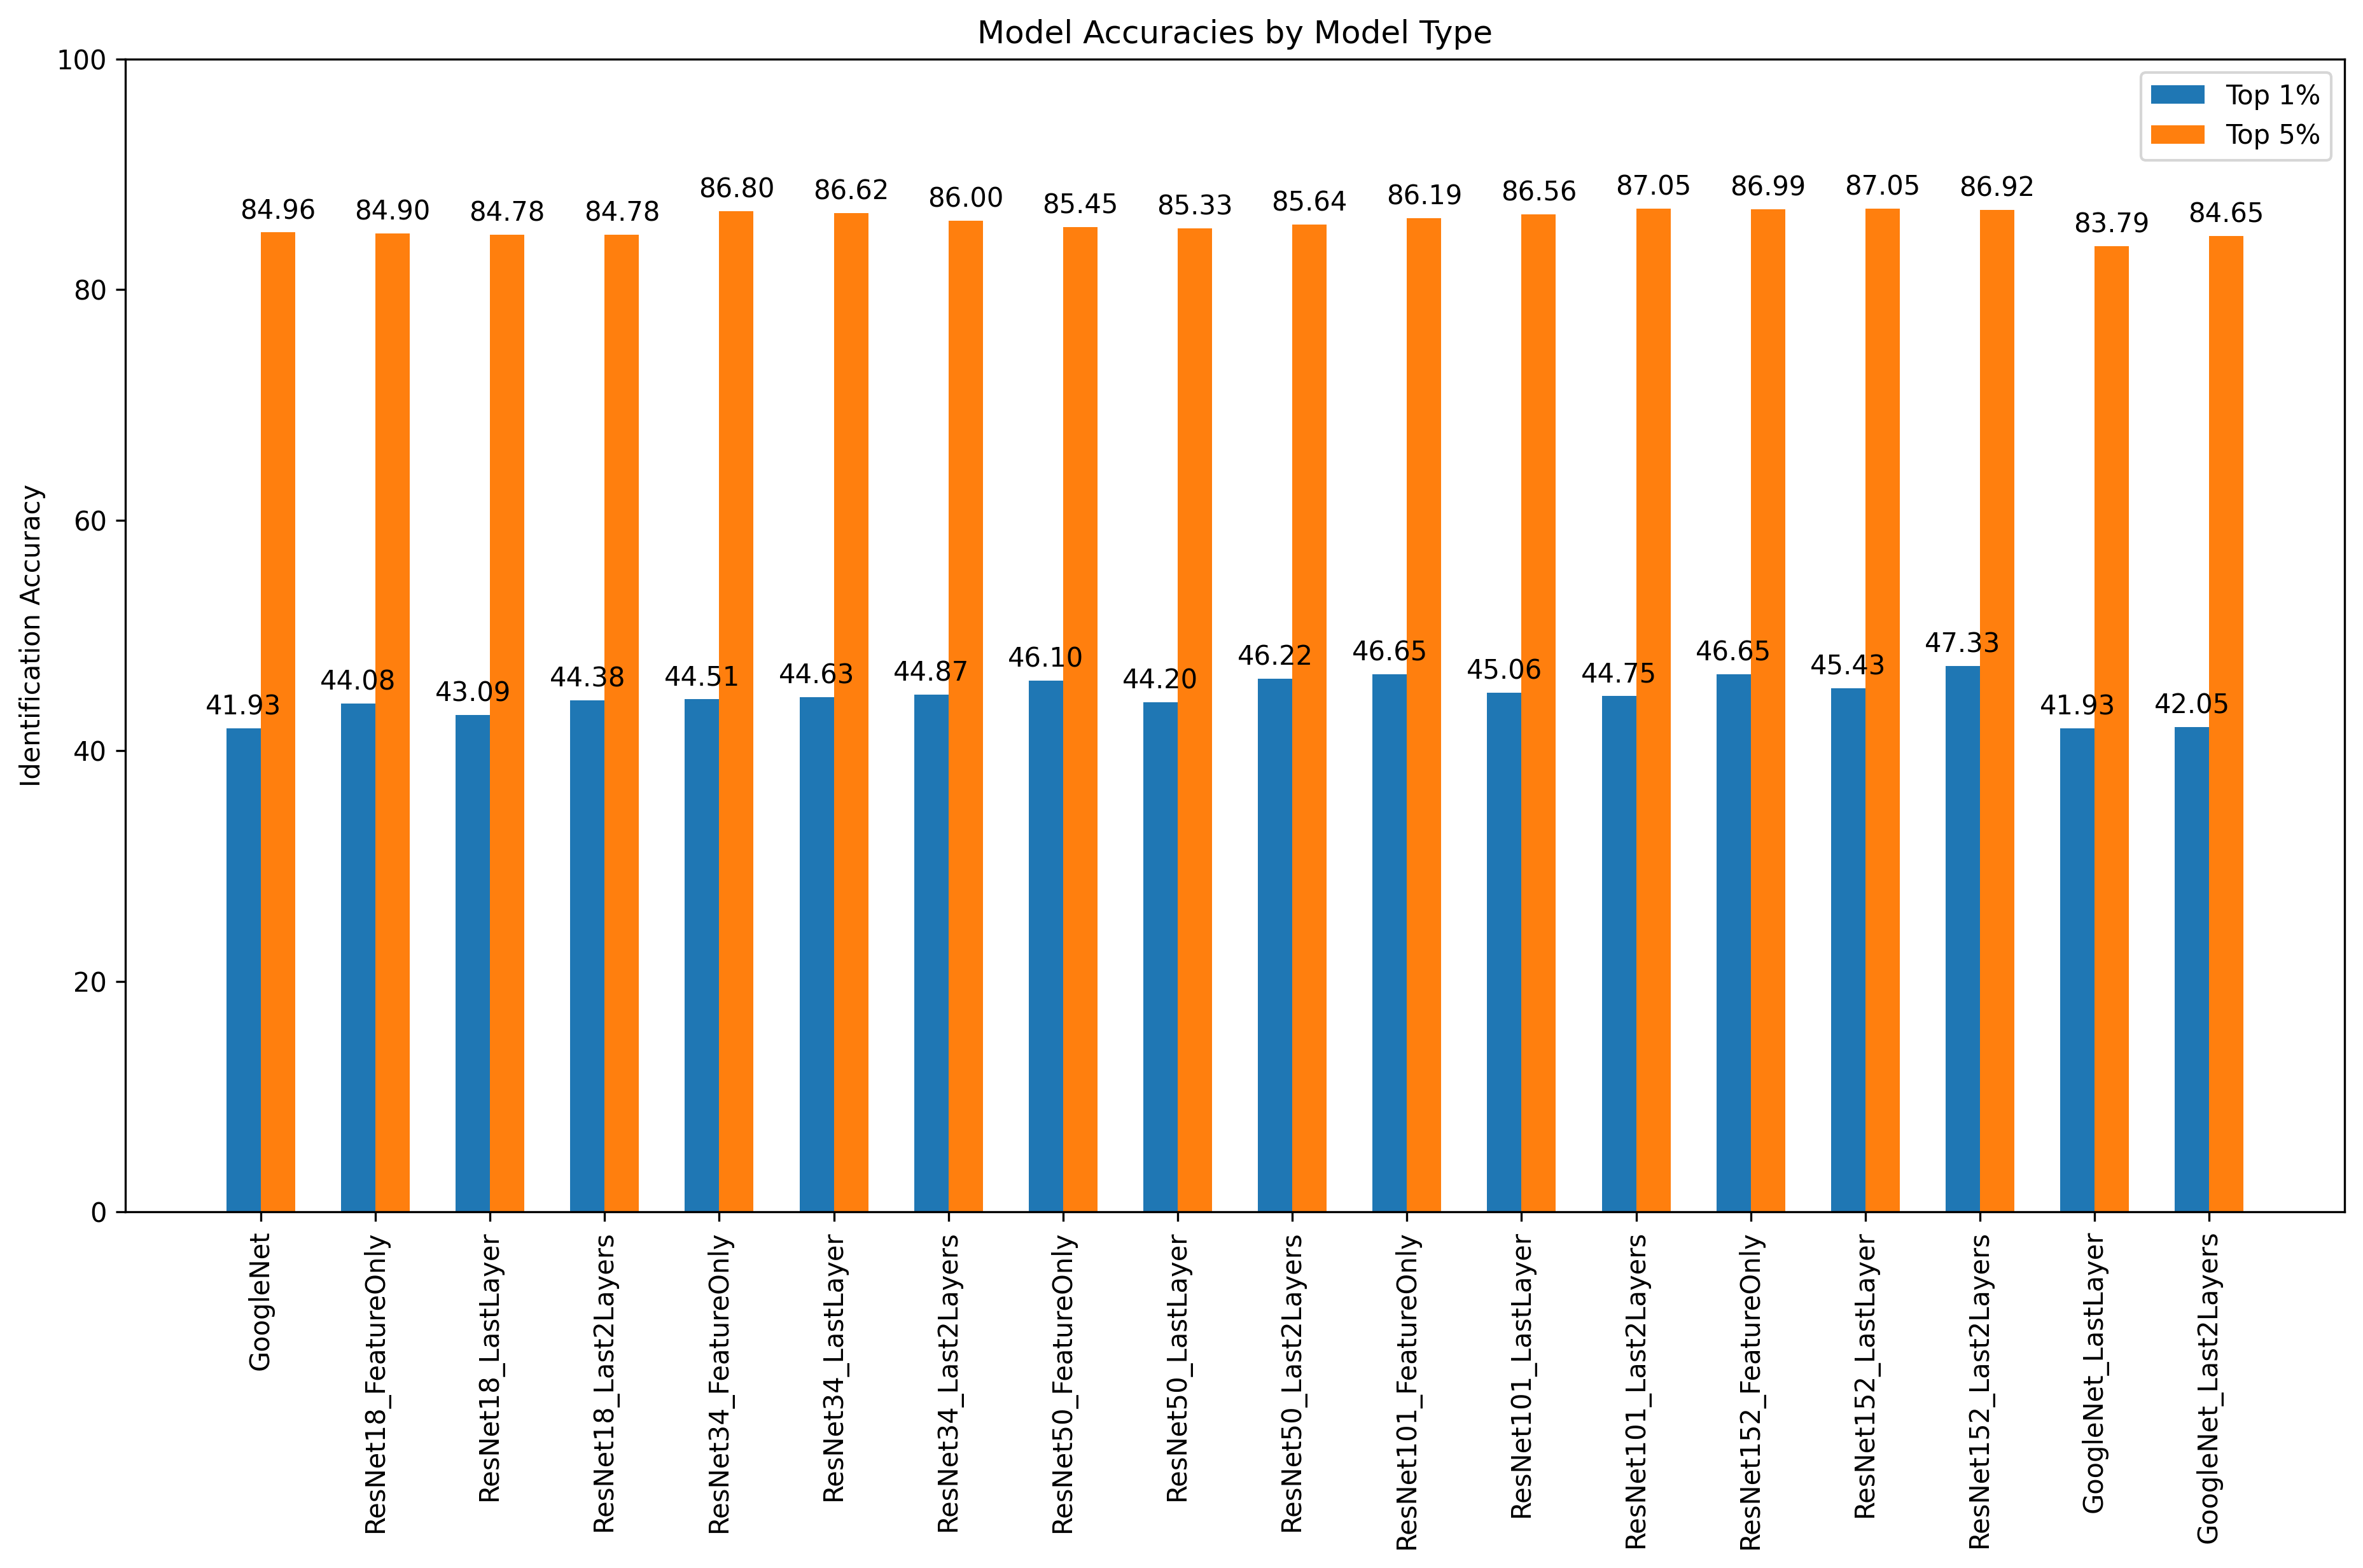

In [14]:
width = 0.3

# plotting grouped barcharts by model 
fig, ax = plt.subplots(figsize = (15,8), dpi = 300)
top1 = ax.bar(np.arange(len(classification_results_df)) - width/2, classification_results_df['Top 1%'], width, label = "Top 1%")
top5 = ax.bar(np.arange(len(classification_results_df)) + width/2, classification_results_df['Top 5%'], width, label = "Top 5%")

# adding axis attributes
ax.set_ylabel('Identification Accuracy')
ax.set_title('Model Accuracies by Model Type')
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(len(classification_results_df)))
ax.set_xticklabels(classification_results_df['Model Name'].str.replace('PretrainedCustom', ''), rotation=90)

# adding labels on top of bars
ax.bar_label(top1, padding=3, fmt='%.2f')
ax.bar_label(top5, padding=3, fmt='%.2f')
ax.legend()

plt.savefig("output/Pretrained Model Accuracies.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("output/Pretrained Model Accuracies.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

# Show Specific Model Results

In [15]:
def generate_model_accuracies(model_name):
    filtered_classification_results_df = classification_results_df[classification_results_df['Model Name'].str.contains(model_name)]
    width = 0.3

    # plotting grouped barcharts by model 
    fig, ax = plt.subplots(figsize = (15,8), dpi = 300)
    top1 = ax.bar(np.arange(len(filtered_classification_results_df)) - width/2, filtered_classification_results_df['Top 1%'], width, label = "Top 1%")
    top5 = ax.bar(np.arange(len(filtered_classification_results_df)) + width/2, filtered_classification_results_df['Top 5%'], width, label = "Top 5%")

    # adding axis attributes
    ax.set_ylabel('Identification Accuracy')
    ax.set_title(f'Model Accuracies for {model_name}')
    ax.set_ylim([0, 100])
    ax.set_xticks(np.arange(len(filtered_classification_results_df)))
    ax.set_xticklabels(filtered_classification_results_df['Model Name'].str.replace('PretrainedCustom', ''))

    # adding labels on top of bars
    ax.bar_label(top1, padding=3, fmt='%.2f')
    ax.bar_label(top5, padding=3, fmt='%.2f')
    ax.legend()

    plt.savefig(f"output/Pretrained Model Accuracies_{model_name}.jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig(f"output/Pretrained Model Accuracies_{model_name}", dpi = 300, bbox_inches = 'tight')
    plt.show()

## GoogLeNet Results

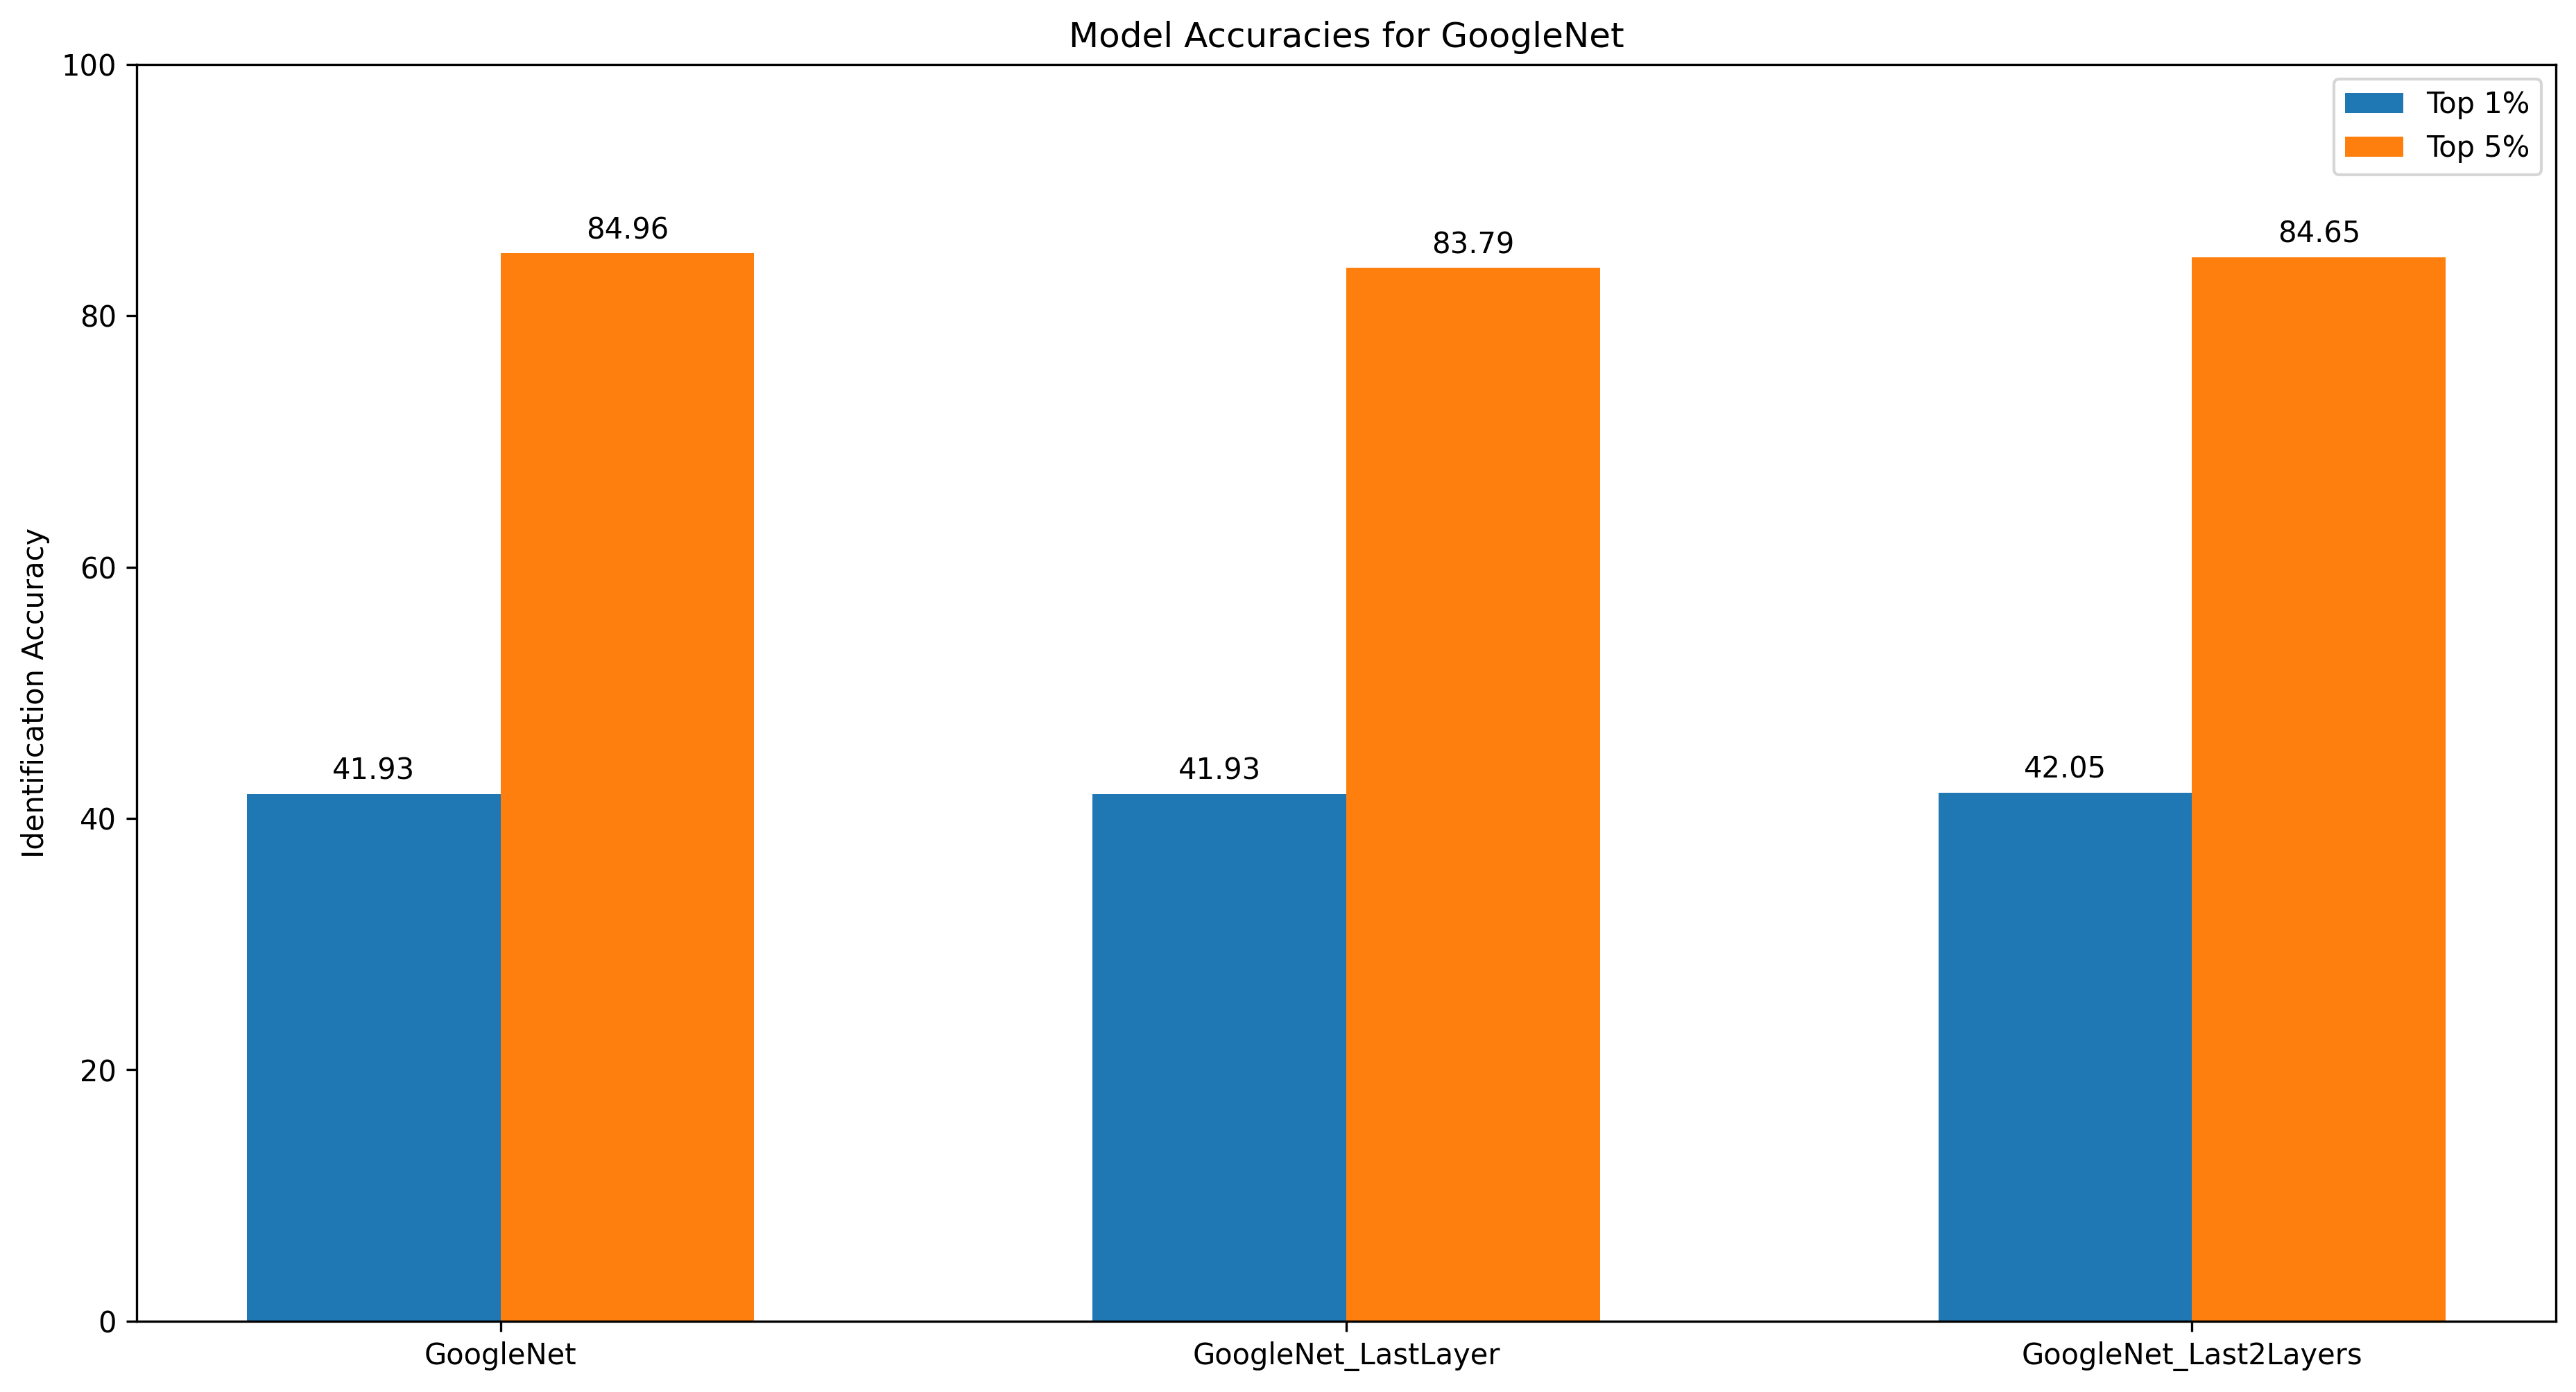

In [16]:
generate_model_accuracies('GoogleNet')

## ResNet18 Results

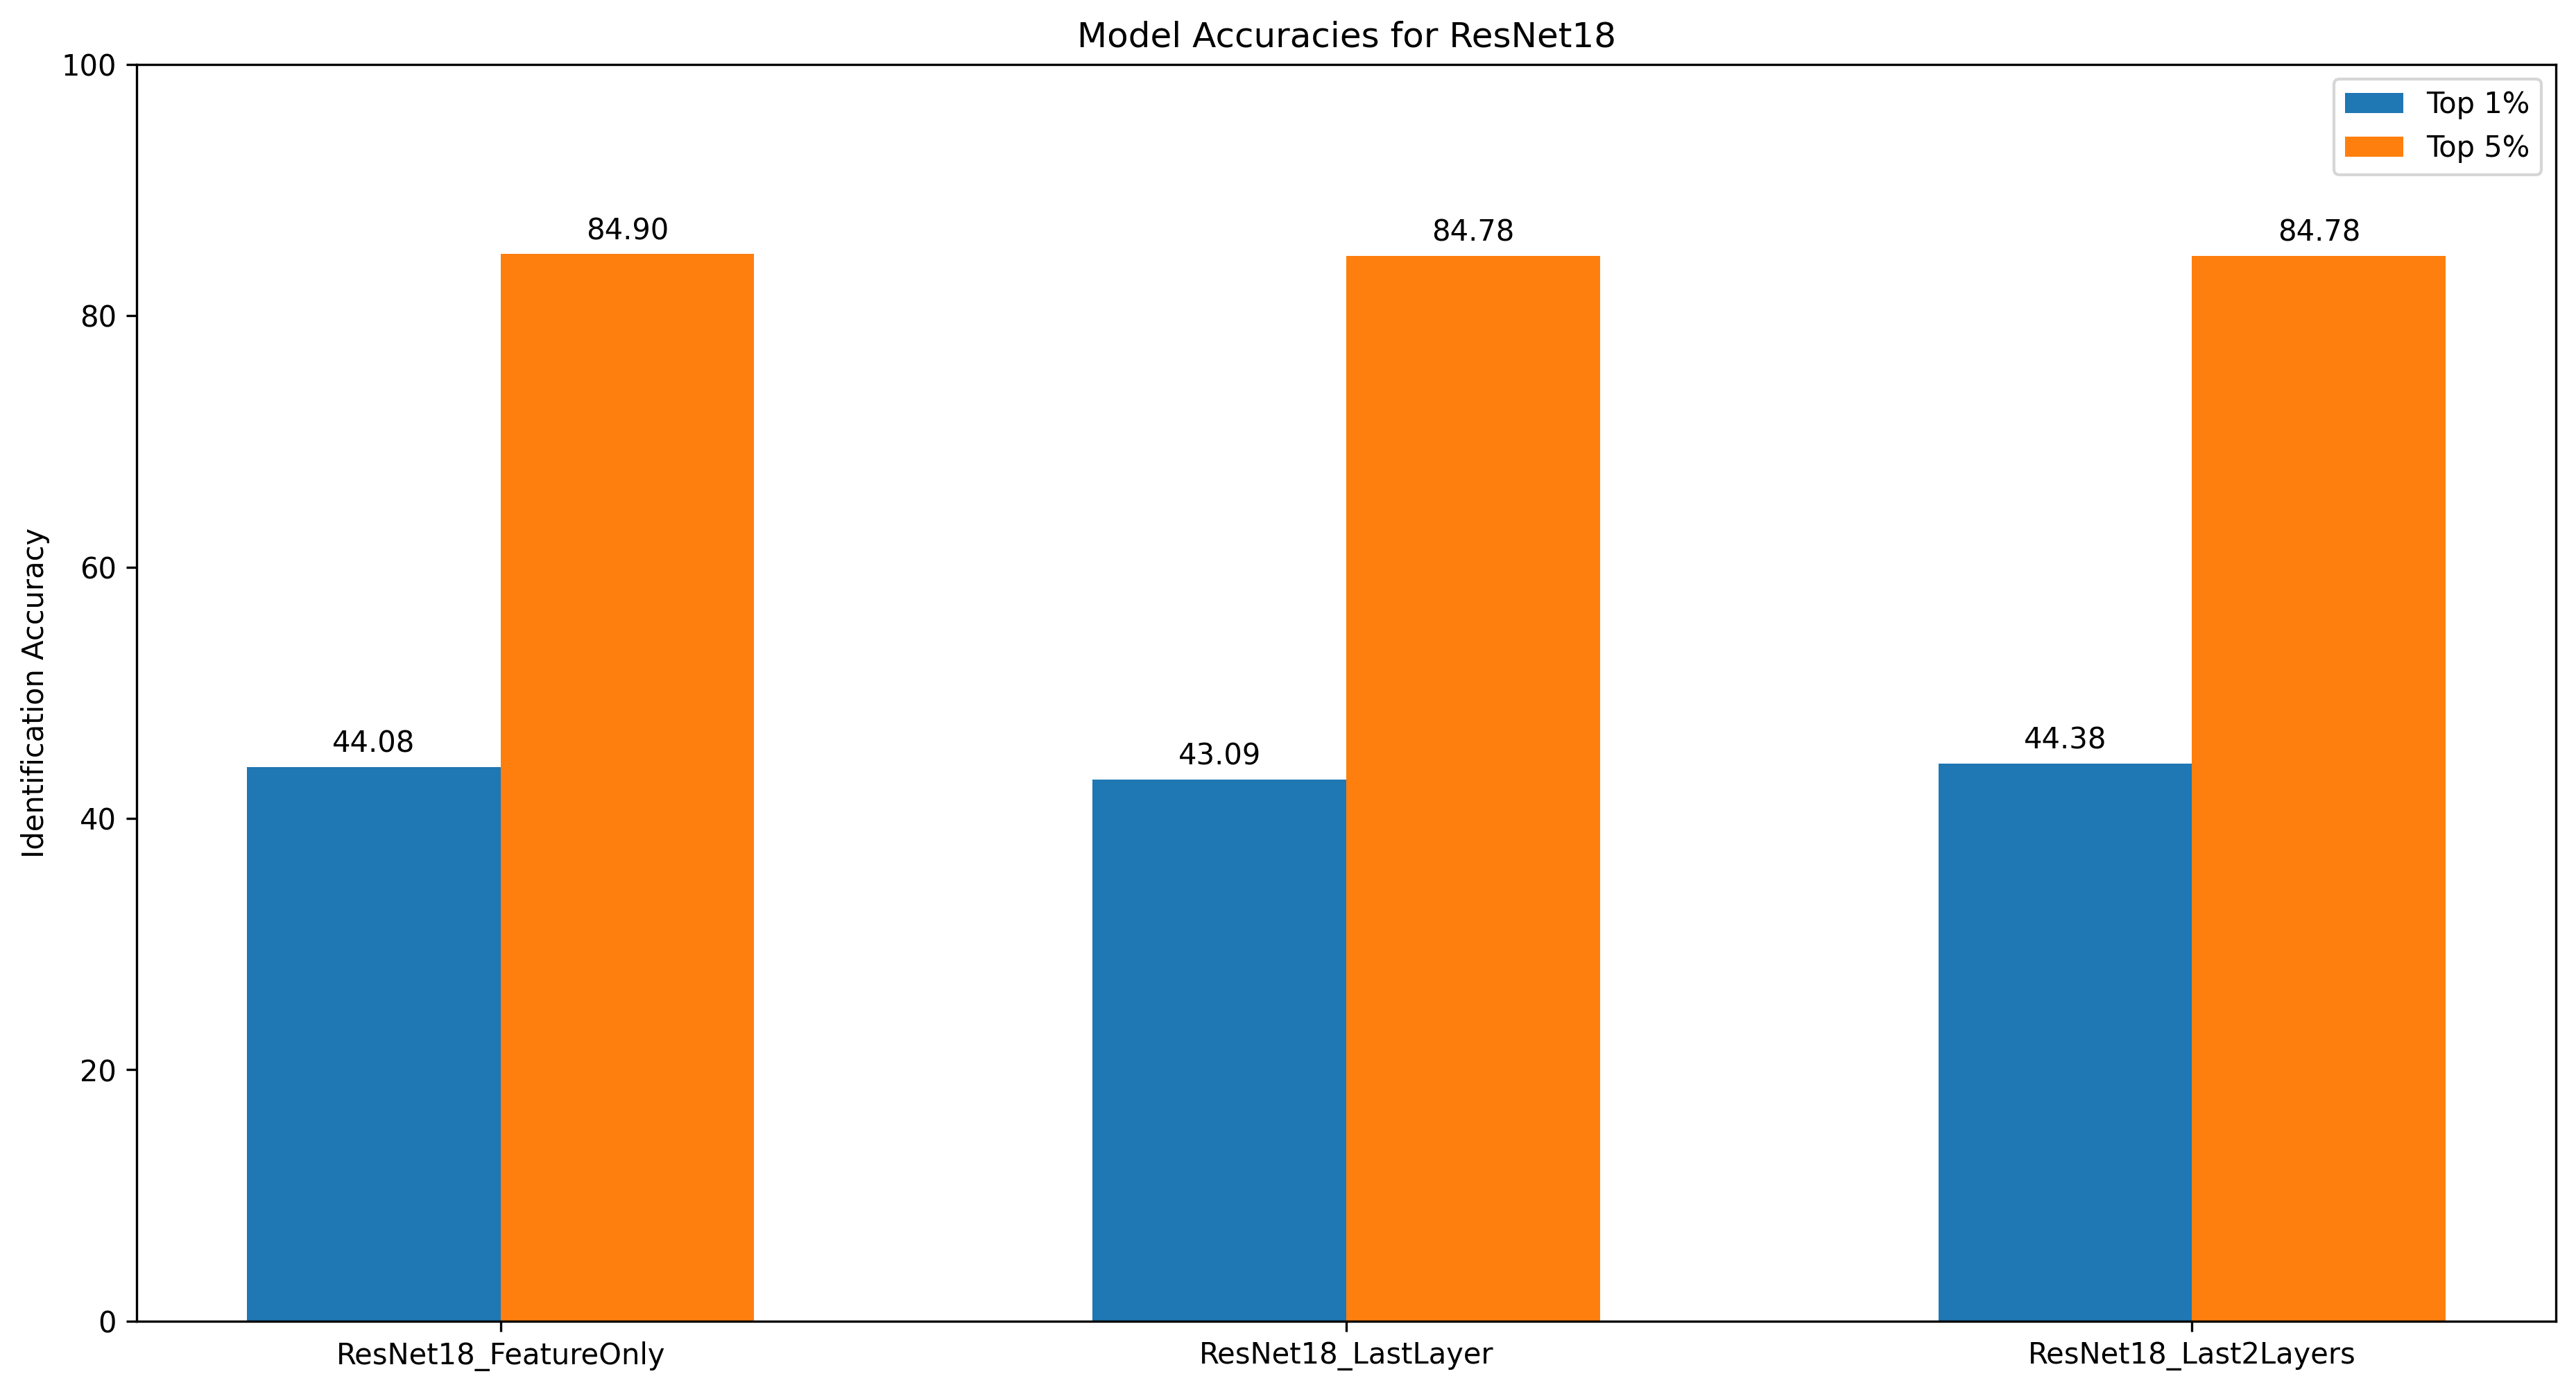

In [17]:
generate_model_accuracies('ResNet18')

## ResNet34 Results

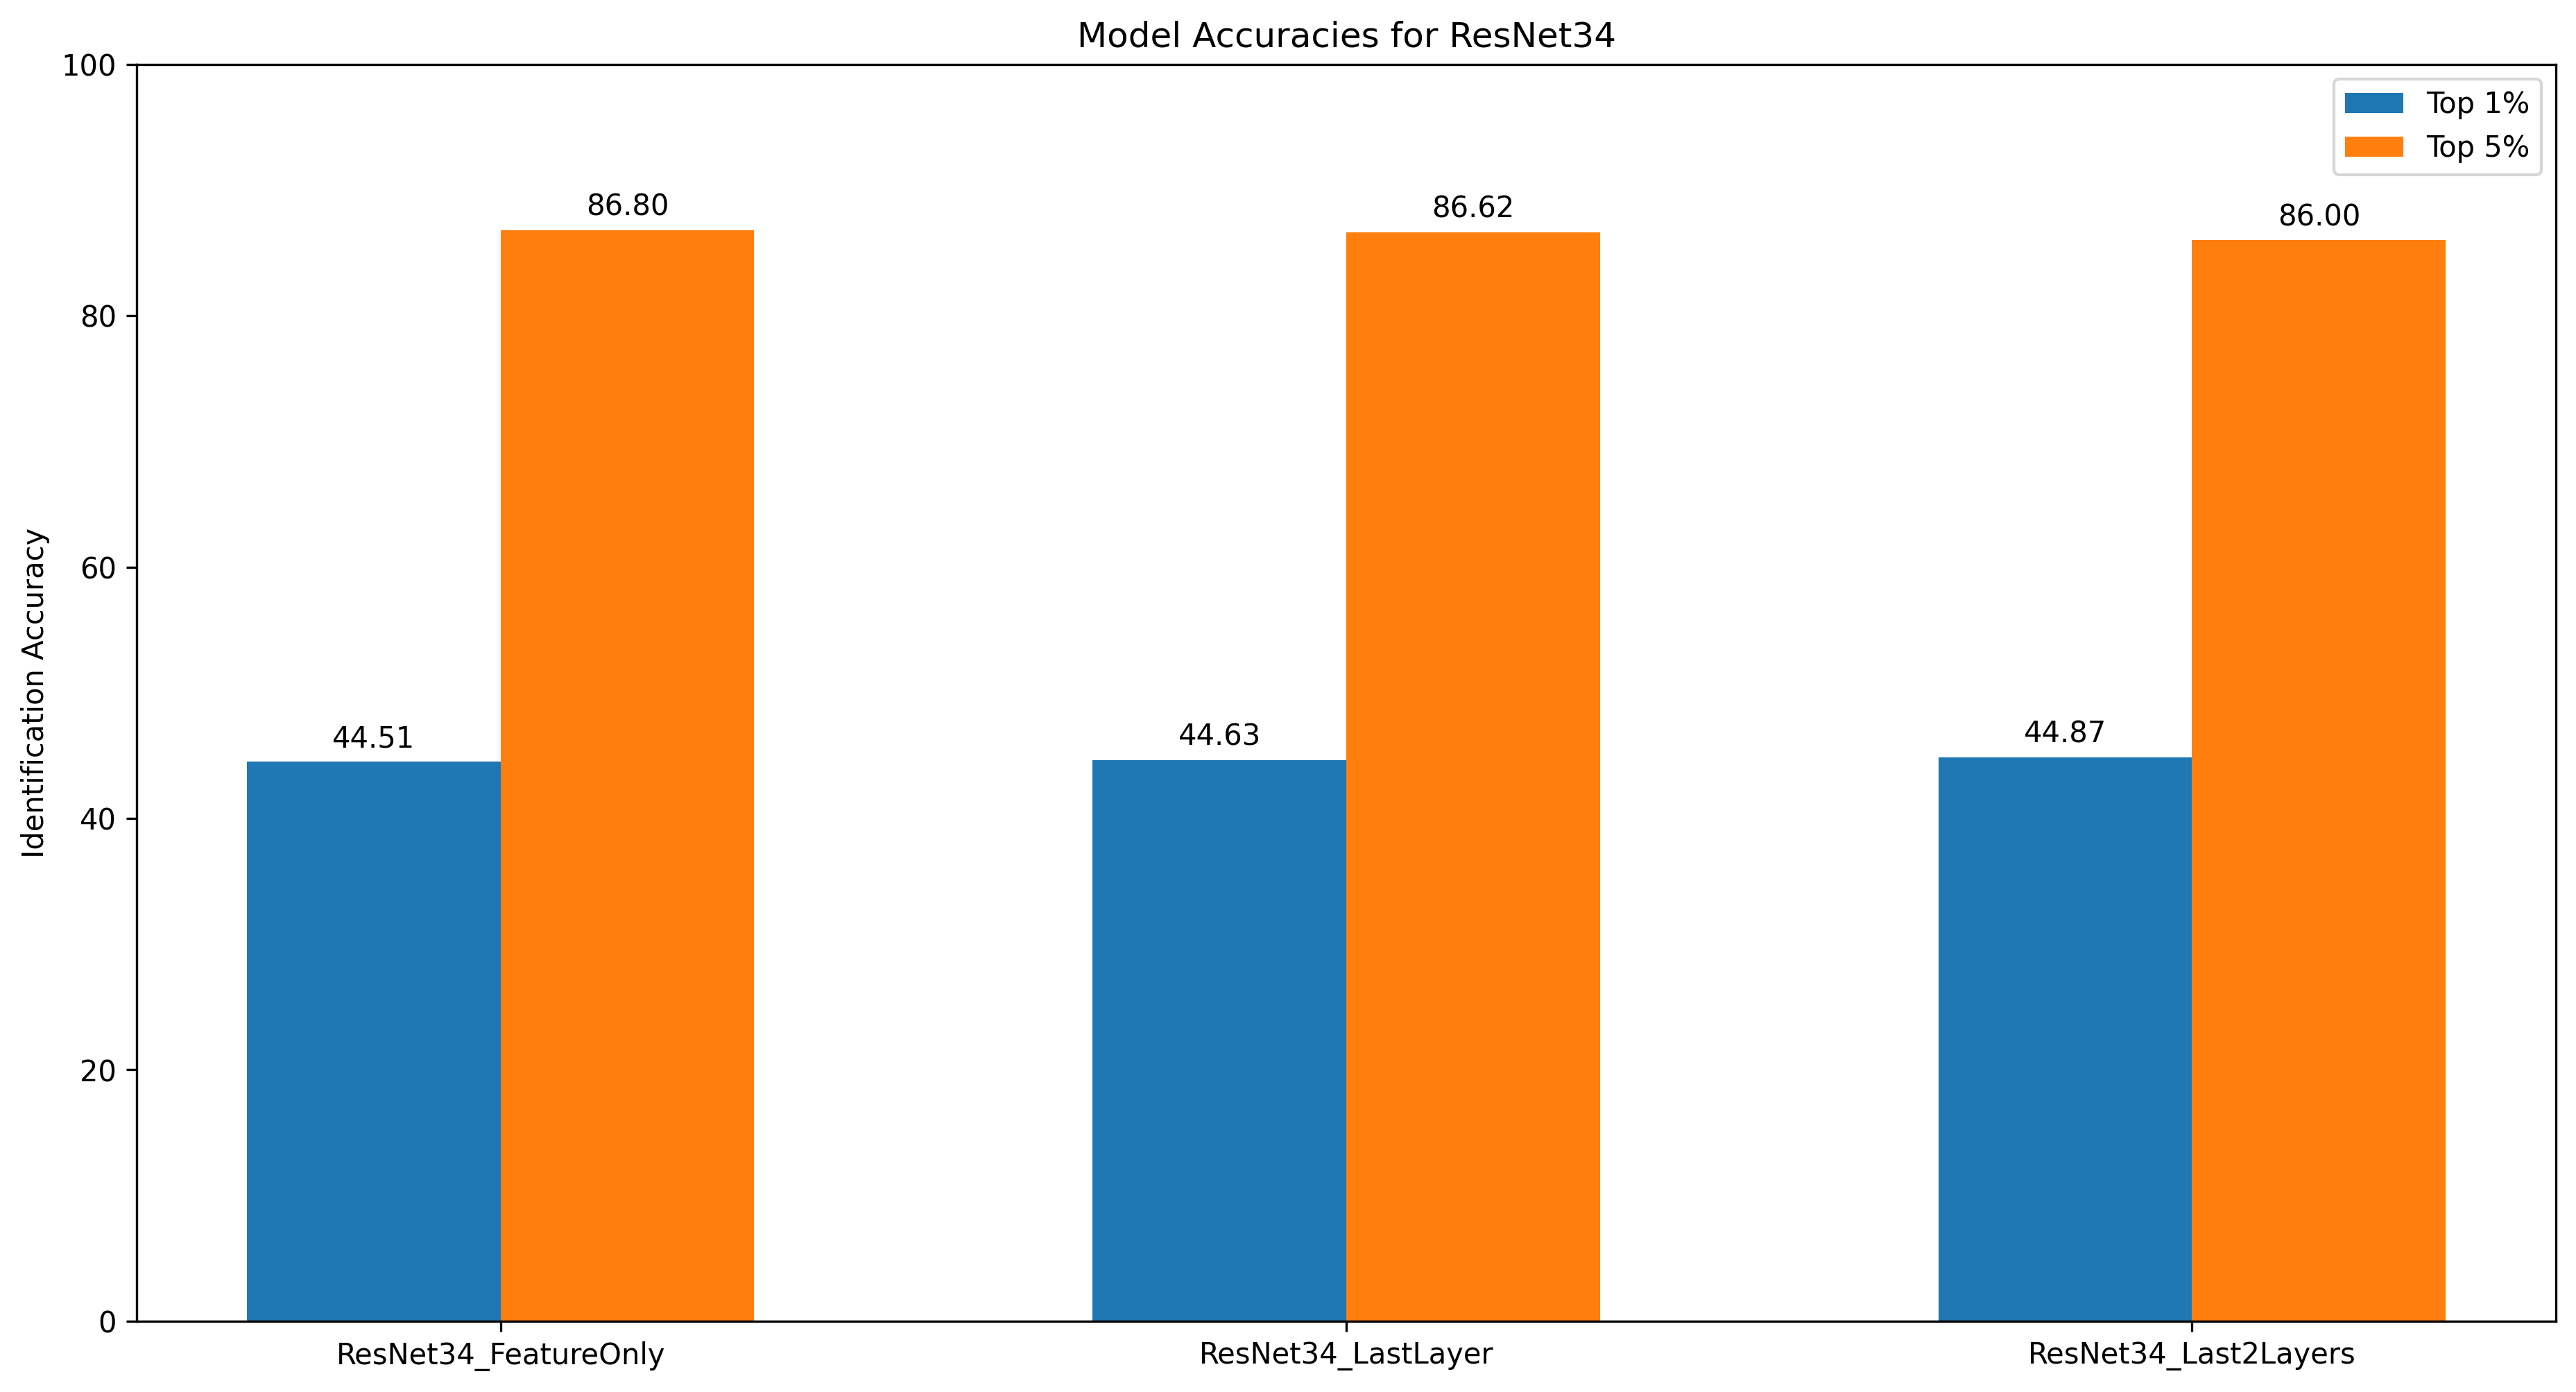

In [18]:
generate_model_accuracies('ResNet34')

## ResNet50 Results

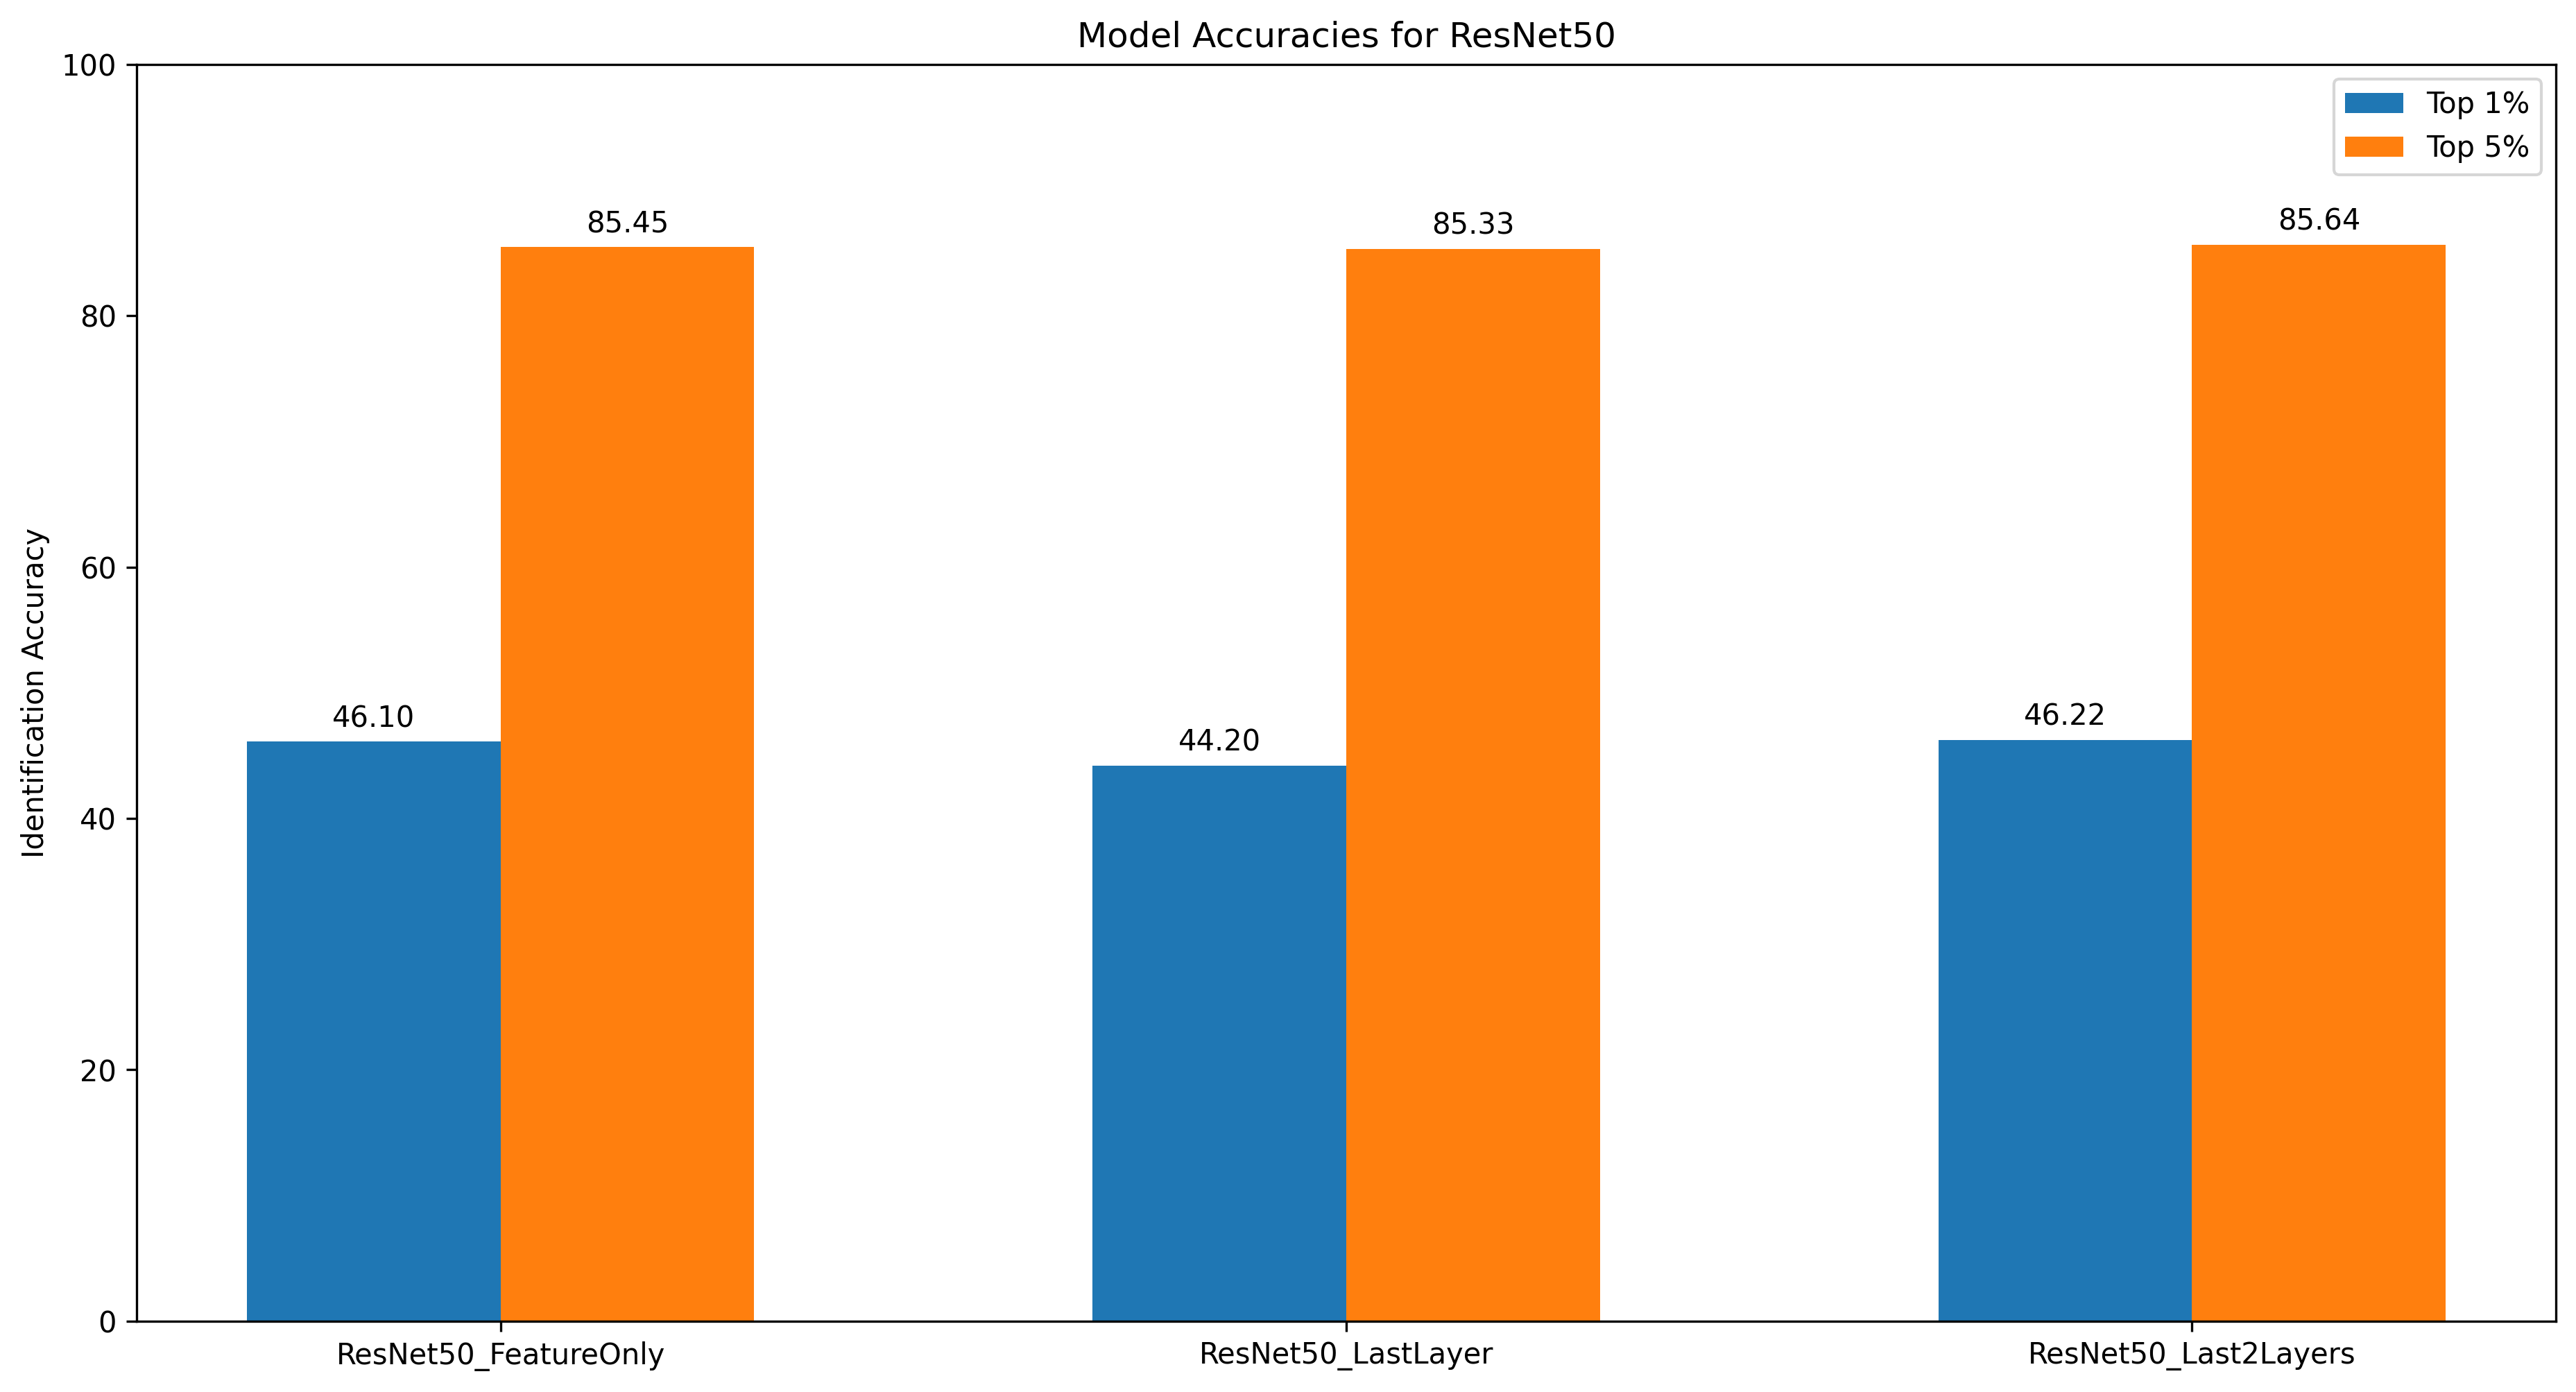

In [19]:
generate_model_accuracies('ResNet50')

## ResNet101 Results

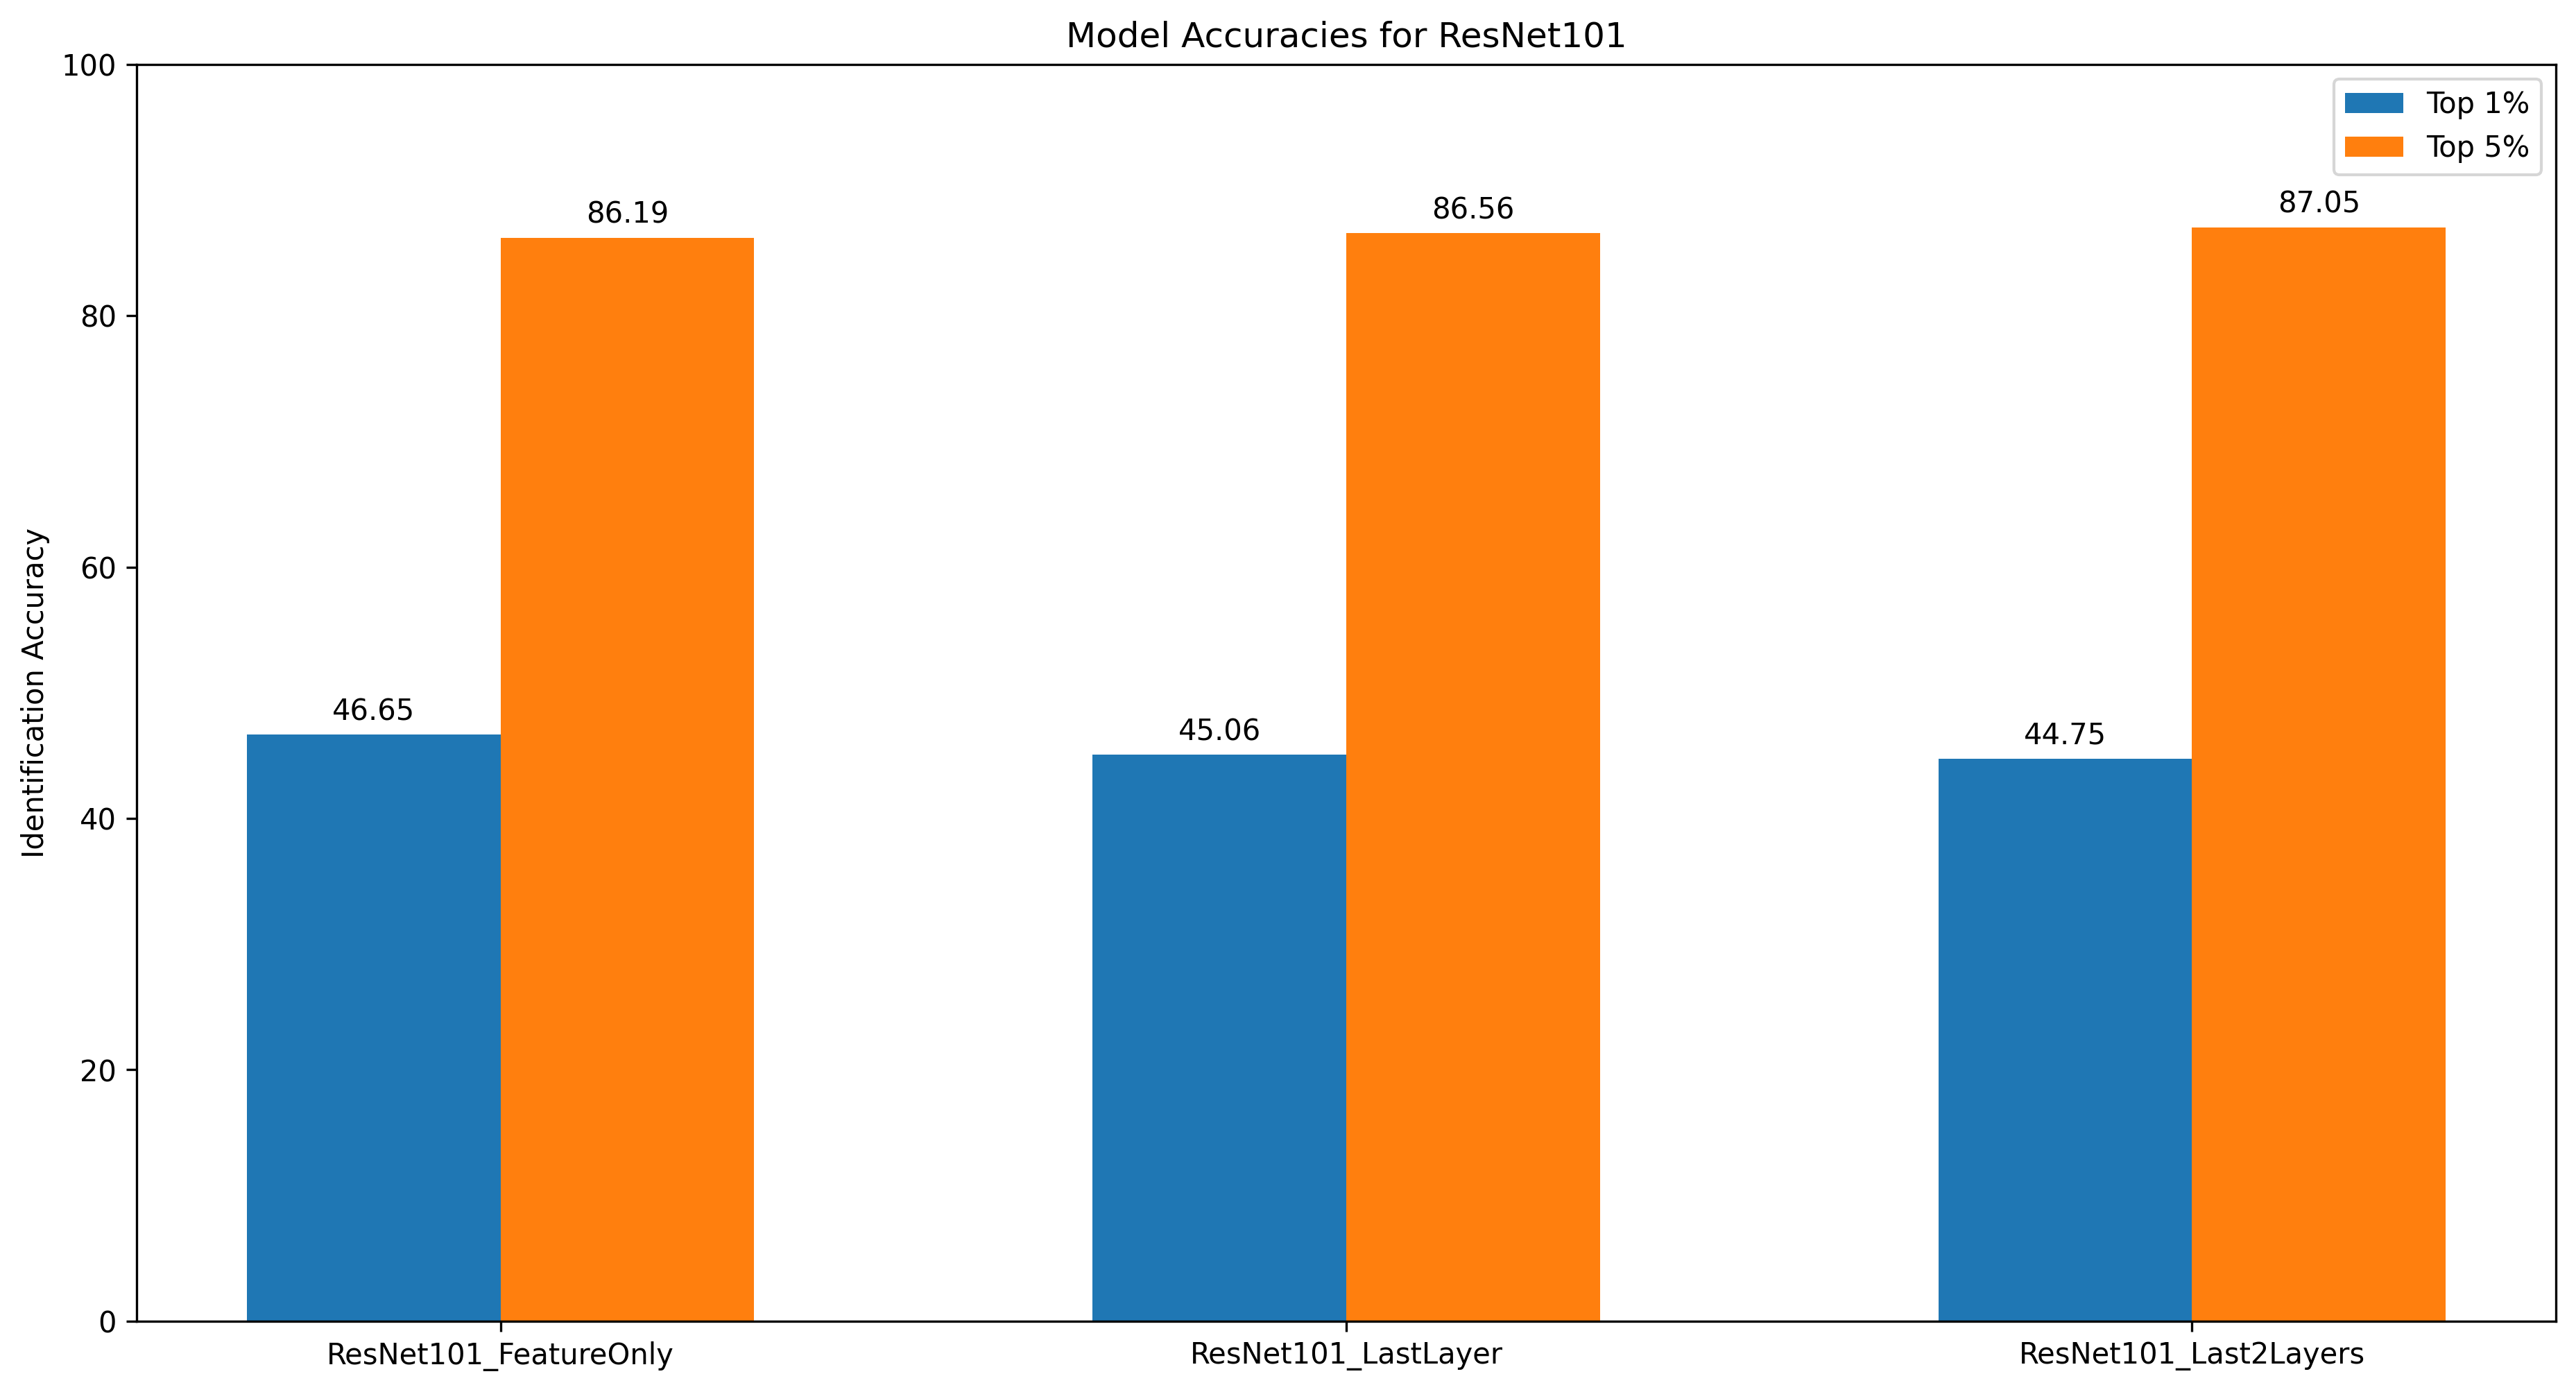

In [20]:
generate_model_accuracies('ResNet101')

## ResNet152 Results

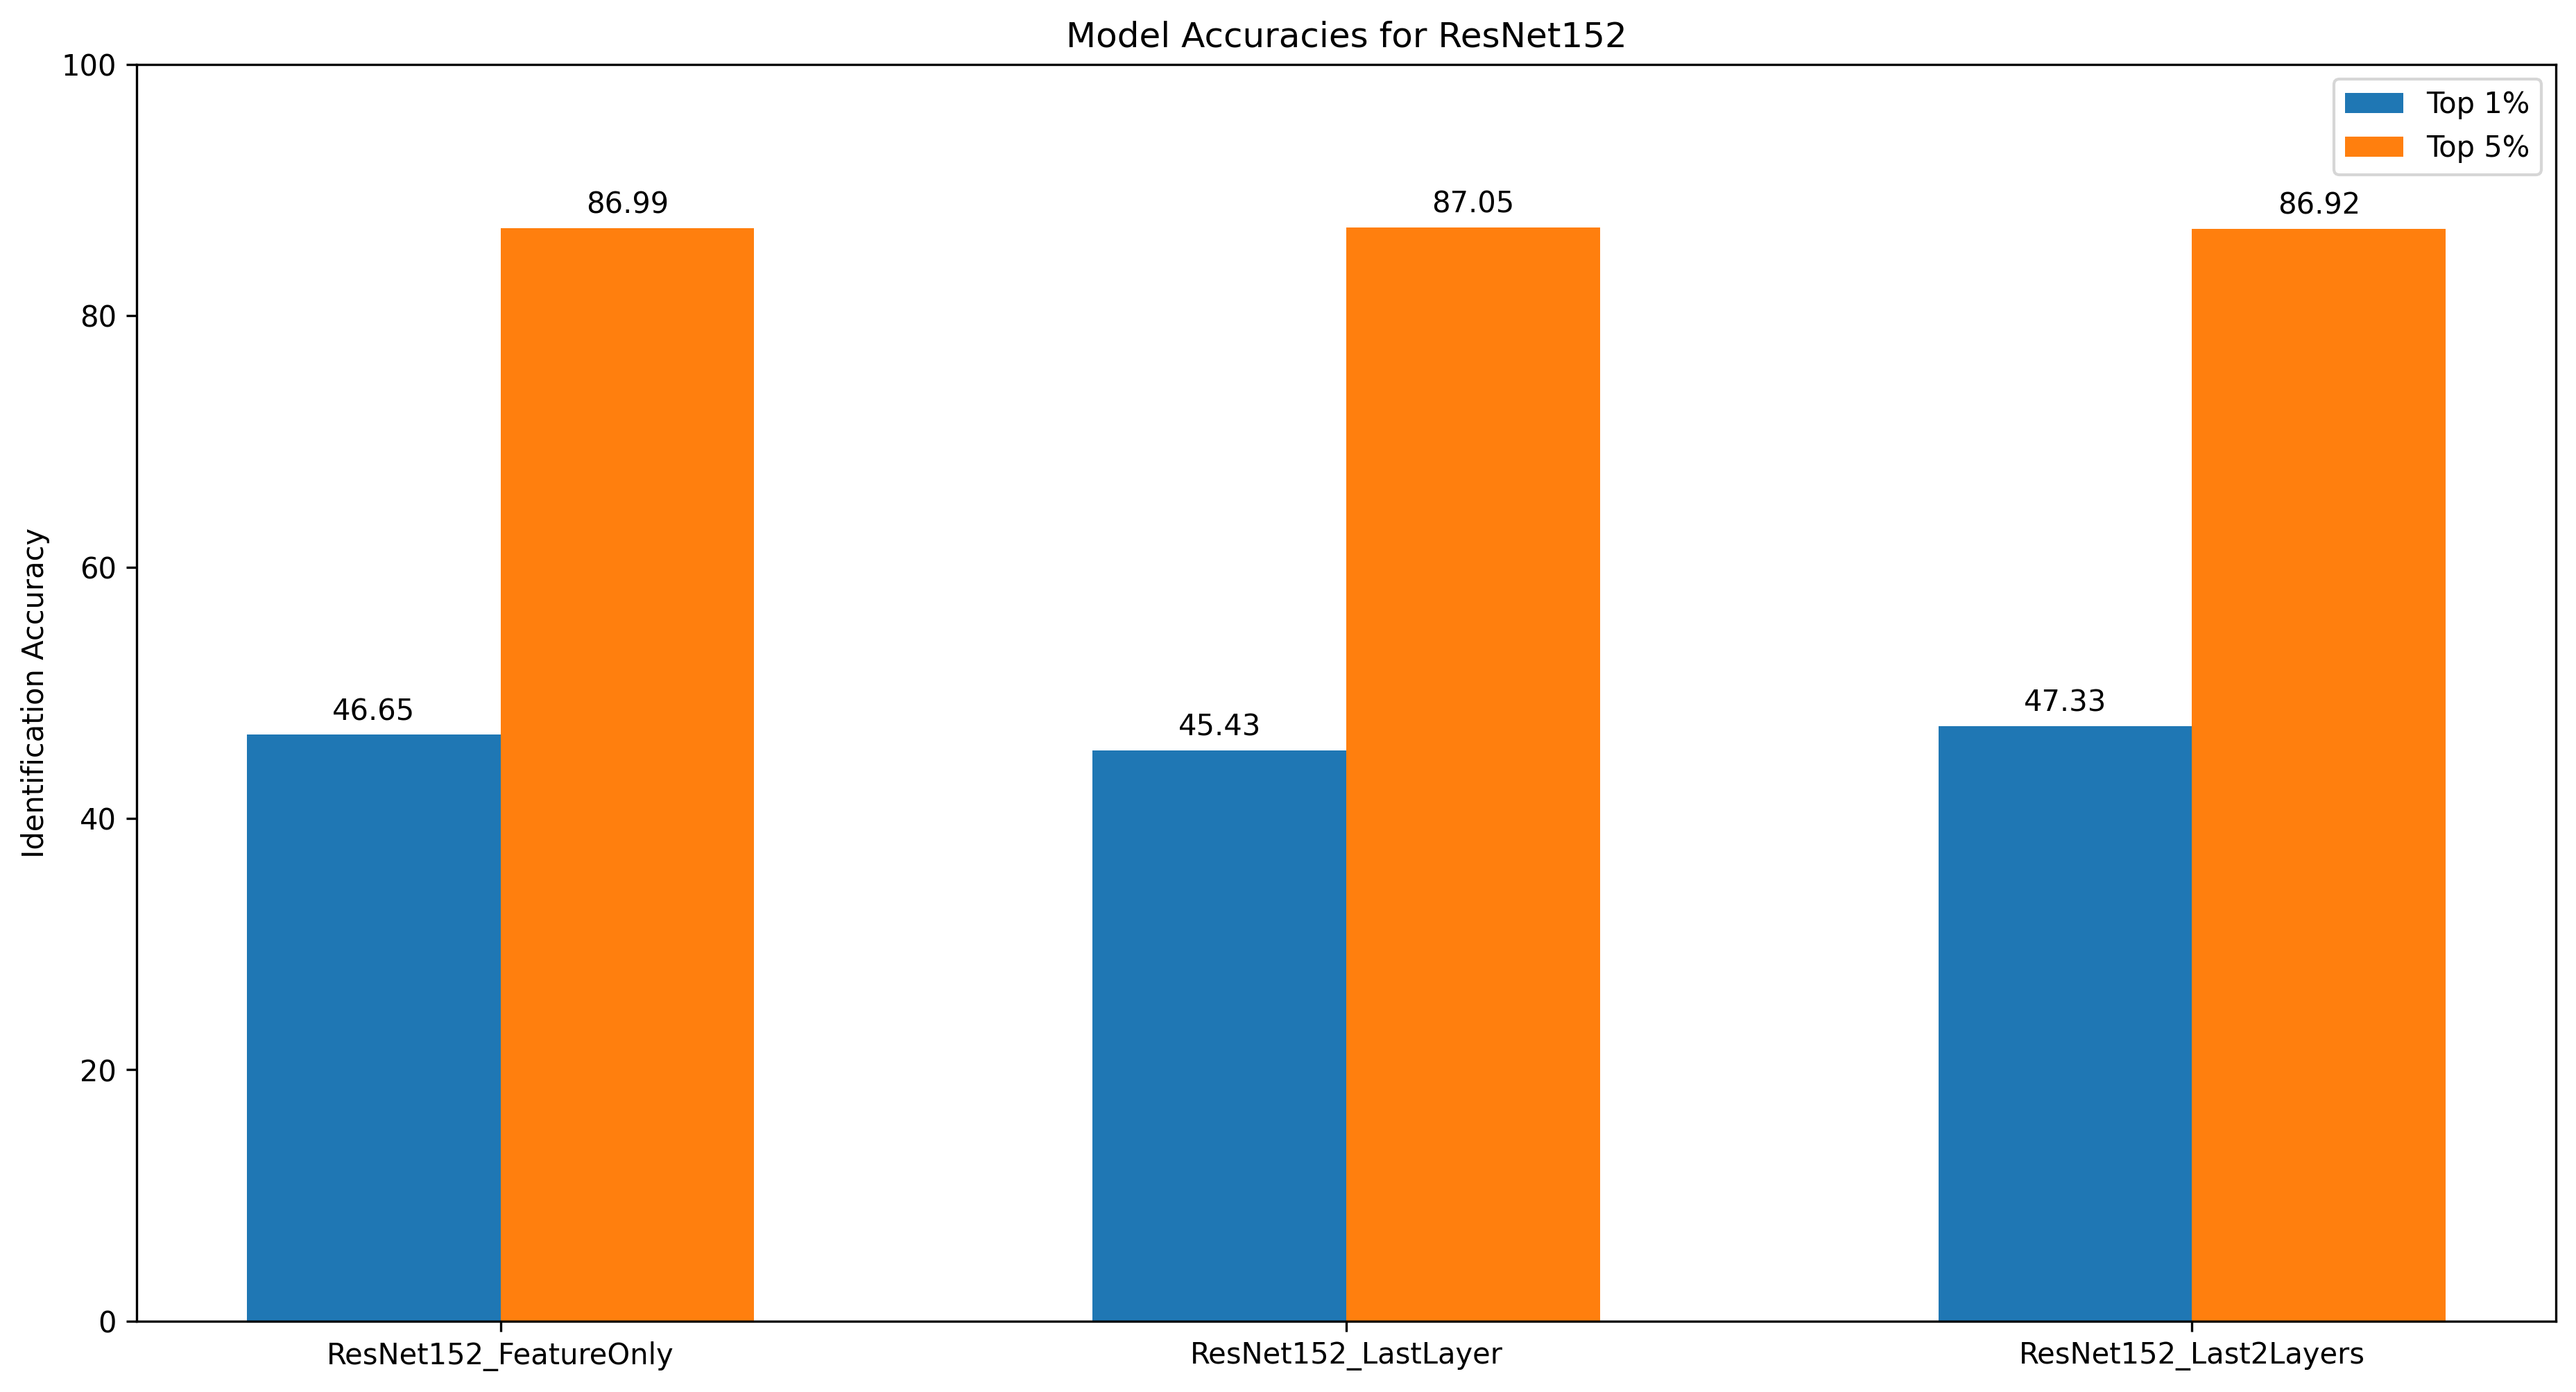

In [21]:
generate_model_accuracies('ResNet152')